<a href="https://colab.research.google.com/github/piyush1856/Business-Case-LoanTap-Logistic-Regression/blob/main/Business_Case_LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

LoanTap, a prominent financial services provider, specializes in offering tailored loan products for millennials. The personal loan segment is one of its key offerings, targeting diverse customer needs. However, effective credit risk assessment remains a significant challenge in this competitive domain. To address this, LoanTap seeks to integrate data-driven approaches for evaluating borrower creditworthiness, thereby enhancing its lending decisions and mitigating risks.

This project explores the application of logistic regression to predict the likelihood of loan repayment, leveraging a dataset containing borrower-specific features such as loan amount, annual income, employment length, interest rates, and credit history. By combining statistical modeling and domain expertise, this study aims to optimize LoanTap’s underwriting framework and operational efficiency.

# **Background**

Credit risk assessment is a cornerstone of the financial lending industry. Traditional methods of evaluating borrower creditworthiness often rely on subjective judgment or outdated scoring mechanisms. In an era of digital transformation, advanced analytics and machine learning techniques have emerged as critical tools to enhance decision-making processes.

Logistic regression, a statistical method for binary classification, is widely adopted for solving credit scoring problems due to its interpretability and efficiency. This technique allows financial institutions to predict whether a borrower will default on a loan (binary outcome) based on multiple explanatory variables. By integrating logistic regression into its underwriting process, LoanTap can improve its risk assessment model, resulting in better resource allocation and customer satisfaction.

# **Concept Used**

This project leverages the following key concepts:

1. **Logistic Regression:** A supervised learning algorithm used for binary classification problems. It estimates the probability of a target variable belonging to a particular class using a logistic function.

2. **Exploratory Data Analysis (EDA):** A critical step to understand data distributions, uncover hidden patterns, and detect anomalies.

3. **Data Preprocessing:** Techniques such as handling missing values, outlier treatment, and normalization are applied to improve data quality.

4. **Feature Engineering:** Transforming raw data into meaningful features, including encoding categorical variables and creating interaction terms.

5. **Model Evaluation:** Assessing model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC curve. Special attention is given to the precision-recall tradeoff to optimize decision thresholds.

6. **Business Insights:** Generating actionable recommendations based on model findings to guide LoanTap’s credit policies and strategic decisions.

# **Dataset Description**

The dataset contains information related to personal loan applications at LoanTap. The goal of this case study is to assess the creditworthiness of borrowers using logistic regression. Below is a detailed description of the dataset and its features:

1. **loan_amnt**:  
   The amount of the loan applied for by the borrower. If the credit department reduces the loan amount, this value reflects the adjusted amount.

2. **term**:  
   The number of payments on the loan, in months. Values can be either 36 or 60 months.

3. **int_rate**:  
   The interest rate applied to the loan.

4. **installment**:  
   The monthly payment owed by the borrower if the loan is approved.

5. **grade**:  
   The loan grade assigned by LoanTap based on risk ratings.

6. **sub_grade**:  
   The subgrade assigned by LoanTap based on more granular risk ratings.

7. **emp_title**:  
   The job title provided by the borrower when applying for the loan.

8. **emp_length**:  
   The employment length in years. Possible values range from 0 (less than one year) to 10 (ten or more years).

9. **home_ownership**:  
   The borrower's home ownership status (e.g., own, rent, mortgage).

10. **annual_inc**:  
    The self-reported annual income provided by the borrower during registration.

11. **verification_status**:  
    Indicates whether the borrower's income was verified, not verified, or if the income source was verified by LoanTap.

12. **issue_d**:  
    The month when the loan was funded.

13. **loan_status**:  
    The current status of the loan. This is the target variable, which will be used to assess the likelihood of loan default.

14. **purpose**:  
    The category provided by the borrower for the loan request (e.g., debt consolidation, home improvement).

15. **title**:  
    The loan title provided by the borrower during the loan application.

16. **dti (Debt-to-Income ratio)**:  
    A ratio calculated using the borrower's total monthly debt payments on total debt obligations, excluding the mortgage and the requested loan, divided by the borrower's self-reported monthly income.

17. **earliest_cr_line**:  
    The month when the borrower's earliest reported credit line was opened.

18. **open_acc**:  
    The number of open credit lines in the borrower's credit file.

19. **pub_rec**:  
    The number of derogatory public records in the borrower's credit report.

20. **revol_bal**:  
    The total balance on the borrower's revolving credit accounts.

21. **revol_util**:  
    The revolving line utilization rate, representing the amount of credit the borrower is using relative to all available revolving credit.

22. **total_acc**:  
    The total number of credit lines in the borrower's credit file.

23. **initial_list_status**:  
    The loan’s first category, which can either be 'W' (for "waiting") or 'F' (for "funded").

24. **application_type**:  
    Indicates whether the loan is an individual application or a joint application (with two co-borrowers).

25. **mort_acc**:  
    The number of mortgage accounts associated with the borrower.

26. **pub_rec_bankruptcies**:  
    The number of public record bankruptcies associated with the borrower.

27. **Address**:  
    The borrower's location (address).

## **Define Problem Statement and Perform Exploratory Data Analysis**

### **Objective**

The primary objectives of this business case are:

- To build a logistic regression model that predicts loan repayment likelihood based on borrower characteristics.

- To conduct an in-depth exploratory data analysis (EDA) to uncover patterns and relationships within the dataset.

- To identify and address data-related challenges such as missing values, outliers, and class imbalance.

- To evaluate the model’s performance using precision-recall tradeoff and other relevant metrics.

- To derive actionable insights and recommendations for LoanTap’s credit risk management and underwriting policies.

### **Additional Views**

#### **Industry Relevance:**

With the increasing demand for personal loans, financial institutions must innovate to maintain competitive advantages. Predictive modeling not only supports risk mitigation but also aids in offering customized loan products based on borrower profiles. Leveraging logistic regression aligns with industry practices while ensuring a transparent and scalable solution.

#### **Challenges Addressed:**

- **Class Imbalance:** Loan default cases often represent a minority class, necessitating techniques to handle imbalance.

- **Data Quality:** Missing values and noisy data are prevalent in real-world datasets, requiring robust preprocessing.

- **Feature Selection:** Identifying the most relevant predictors of loan repayment is crucial for model accuracy and interpretability.

#### **Business Impact:**

A well-designed logistic regression model can enable LoanTap to:

- Reduce default rates by identifying high-risk borrowers.

- Streamline the loan approval process with automated risk scoring.

- Enhance profitability through optimized resource allocation.

### **Import Libraries and Dataset**

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from imblearn.over_sampling import SMOTE

In [ ]:
# Load the CSV file from the URL
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
df = pd.read_csv('logistic_regression.csv')

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 277MB/s] 


### **Observations on Data**

In [ ]:
# Displaying the first few rows of the dataset to check the structure
df.sample(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
79724,16000.0,36 months,20.20,596.25,D,D5,Teacher,10+ years,MORTGAGE,56000.0,...,13.0,0.0,22910.0,73.0,27.0,f,INDIVIDUAL,3.0,0.0,"022 Freeman Garden\r\nKlineberg, MN 30723"
370591,2000.0,36 months,9.17,63.76,B,B1,Associate Director Fitness,7 years,MORTGAGE,43000.0,...,12.0,0.0,3256.0,83.5,19.0,f,INDIVIDUAL,3.0,0.0,"8702 Gonzalez Grove\r\nAmandamouth, NJ 30723"
376720,16000.0,60 months,23.63,456.86,F,F3,us army,10+ years,MORTGAGE,66000.0,...,6.0,0.0,4062.0,62.5,13.0,f,INDIVIDUAL,3.0,0.0,"72586 Gregory Mills\r\nPatriciaside, RI 22690"
107992,14125.0,36 months,16.78,502.05,C,C5,Carolinas Healthcare System,< 1 year,MORTGAGE,81500.0,...,12.0,0.0,44251.0,63.5,30.0,w,INDIVIDUAL,3.0,0.0,"807 Kaitlyn Pike Suite 111\r\nStacyfurt, WA 05113"
115289,14000.0,36 months,15.80,490.82,C,C3,united states postal service,10+ years,MORTGAGE,65000.0,...,10.0,0.0,7901.0,88.8,24.0,w,INDIVIDUAL,4.0,0.0,"3278 Jones Dam Apt. 930\r\nWaltertown, CT 00813"
34560,6725.0,36 months,15.61,235.14,C,C3,Director of Nursing,< 1 year,MORTGAGE,70000.0,...,7.0,1.0,2421.0,17.5,43.0,f,INDIVIDUAL,4.0,1.0,"6135 Joseph Coves\r\nHolmesside, AR 05113"
39506,15000.0,36 months,14.09,513.33,B,B5,Mothers Nutritional Center,10+ years,RENT,54000.0,...,10.0,0.0,9767.0,70.3,36.0,w,INDIVIDUAL,4.0,0.0,656 Rebecca Gardens Apt. 693\r\nNorth Jasonbur...
256783,5975.0,36 months,14.65,206.11,C,C5,Shipping,10+ years,OWN,53000.0,...,8.0,1.0,3753.0,65.0,24.0,w,INDIVIDUAL,2.0,1.0,"542 Monique Station\r\nReyesland, AK 48052"
250026,20000.0,36 months,14.85,691.84,C,C5,Lead Aerospace Engineer,10+ years,OWN,110000.0,...,15.0,0.0,77139.0,61.6,45.0,w,INDIVIDUAL,3.0,0.0,"856 Cross Stream\r\nMorganshire, SD 05113"
260456,13000.0,36 months,9.49,416.37,B,B2,Psychologist,1 year,RENT,72000.0,...,13.0,0.0,19023.0,73.7,45.0,w,INDIVIDUAL,0.0,0.0,"34567 Davis Plains\r\nNew Scottborough, ME 00813"


In [ ]:
# Shape of data
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  396030
No. of columns:  27


In [ ]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
# Statistical Summary
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
# Clean column names by stripping any leading/trailing spaces
df.columns = df.columns.str.strip()

In [ ]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

,index,null_count
0,mort_acc,37795
1,emp_title,22927
2,emp_length,18301
3,title,1756
4,pub_rec_bankruptcies,535
5,revol_util,276
6,loan_amnt,0
7,dti,0
8,application_type,0
9,initial_list_status,0


### **Datatype Conversion**

In [ ]:
# Convert 'issue_d' and 'earliest_cr_line' columns to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

In [ ]:
categorical_columns = [
    'term', 'grade', 'sub_grade', 'emp_length',
    'home_ownership', 'verification_status',
    'loan_status', 'purpose', 'initial_list_status',
    'application_type'
]

# Convert to categorical
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [ ]:
df.dtypes

,0
loan_amnt,float64
term,category
int_rate,float64
installment,float64
grade,category
sub_grade,category
emp_title,object
emp_length,category
home_ownership,category
annual_inc,float64


### **Univariate Analysis**

#### **Continuous Variables**

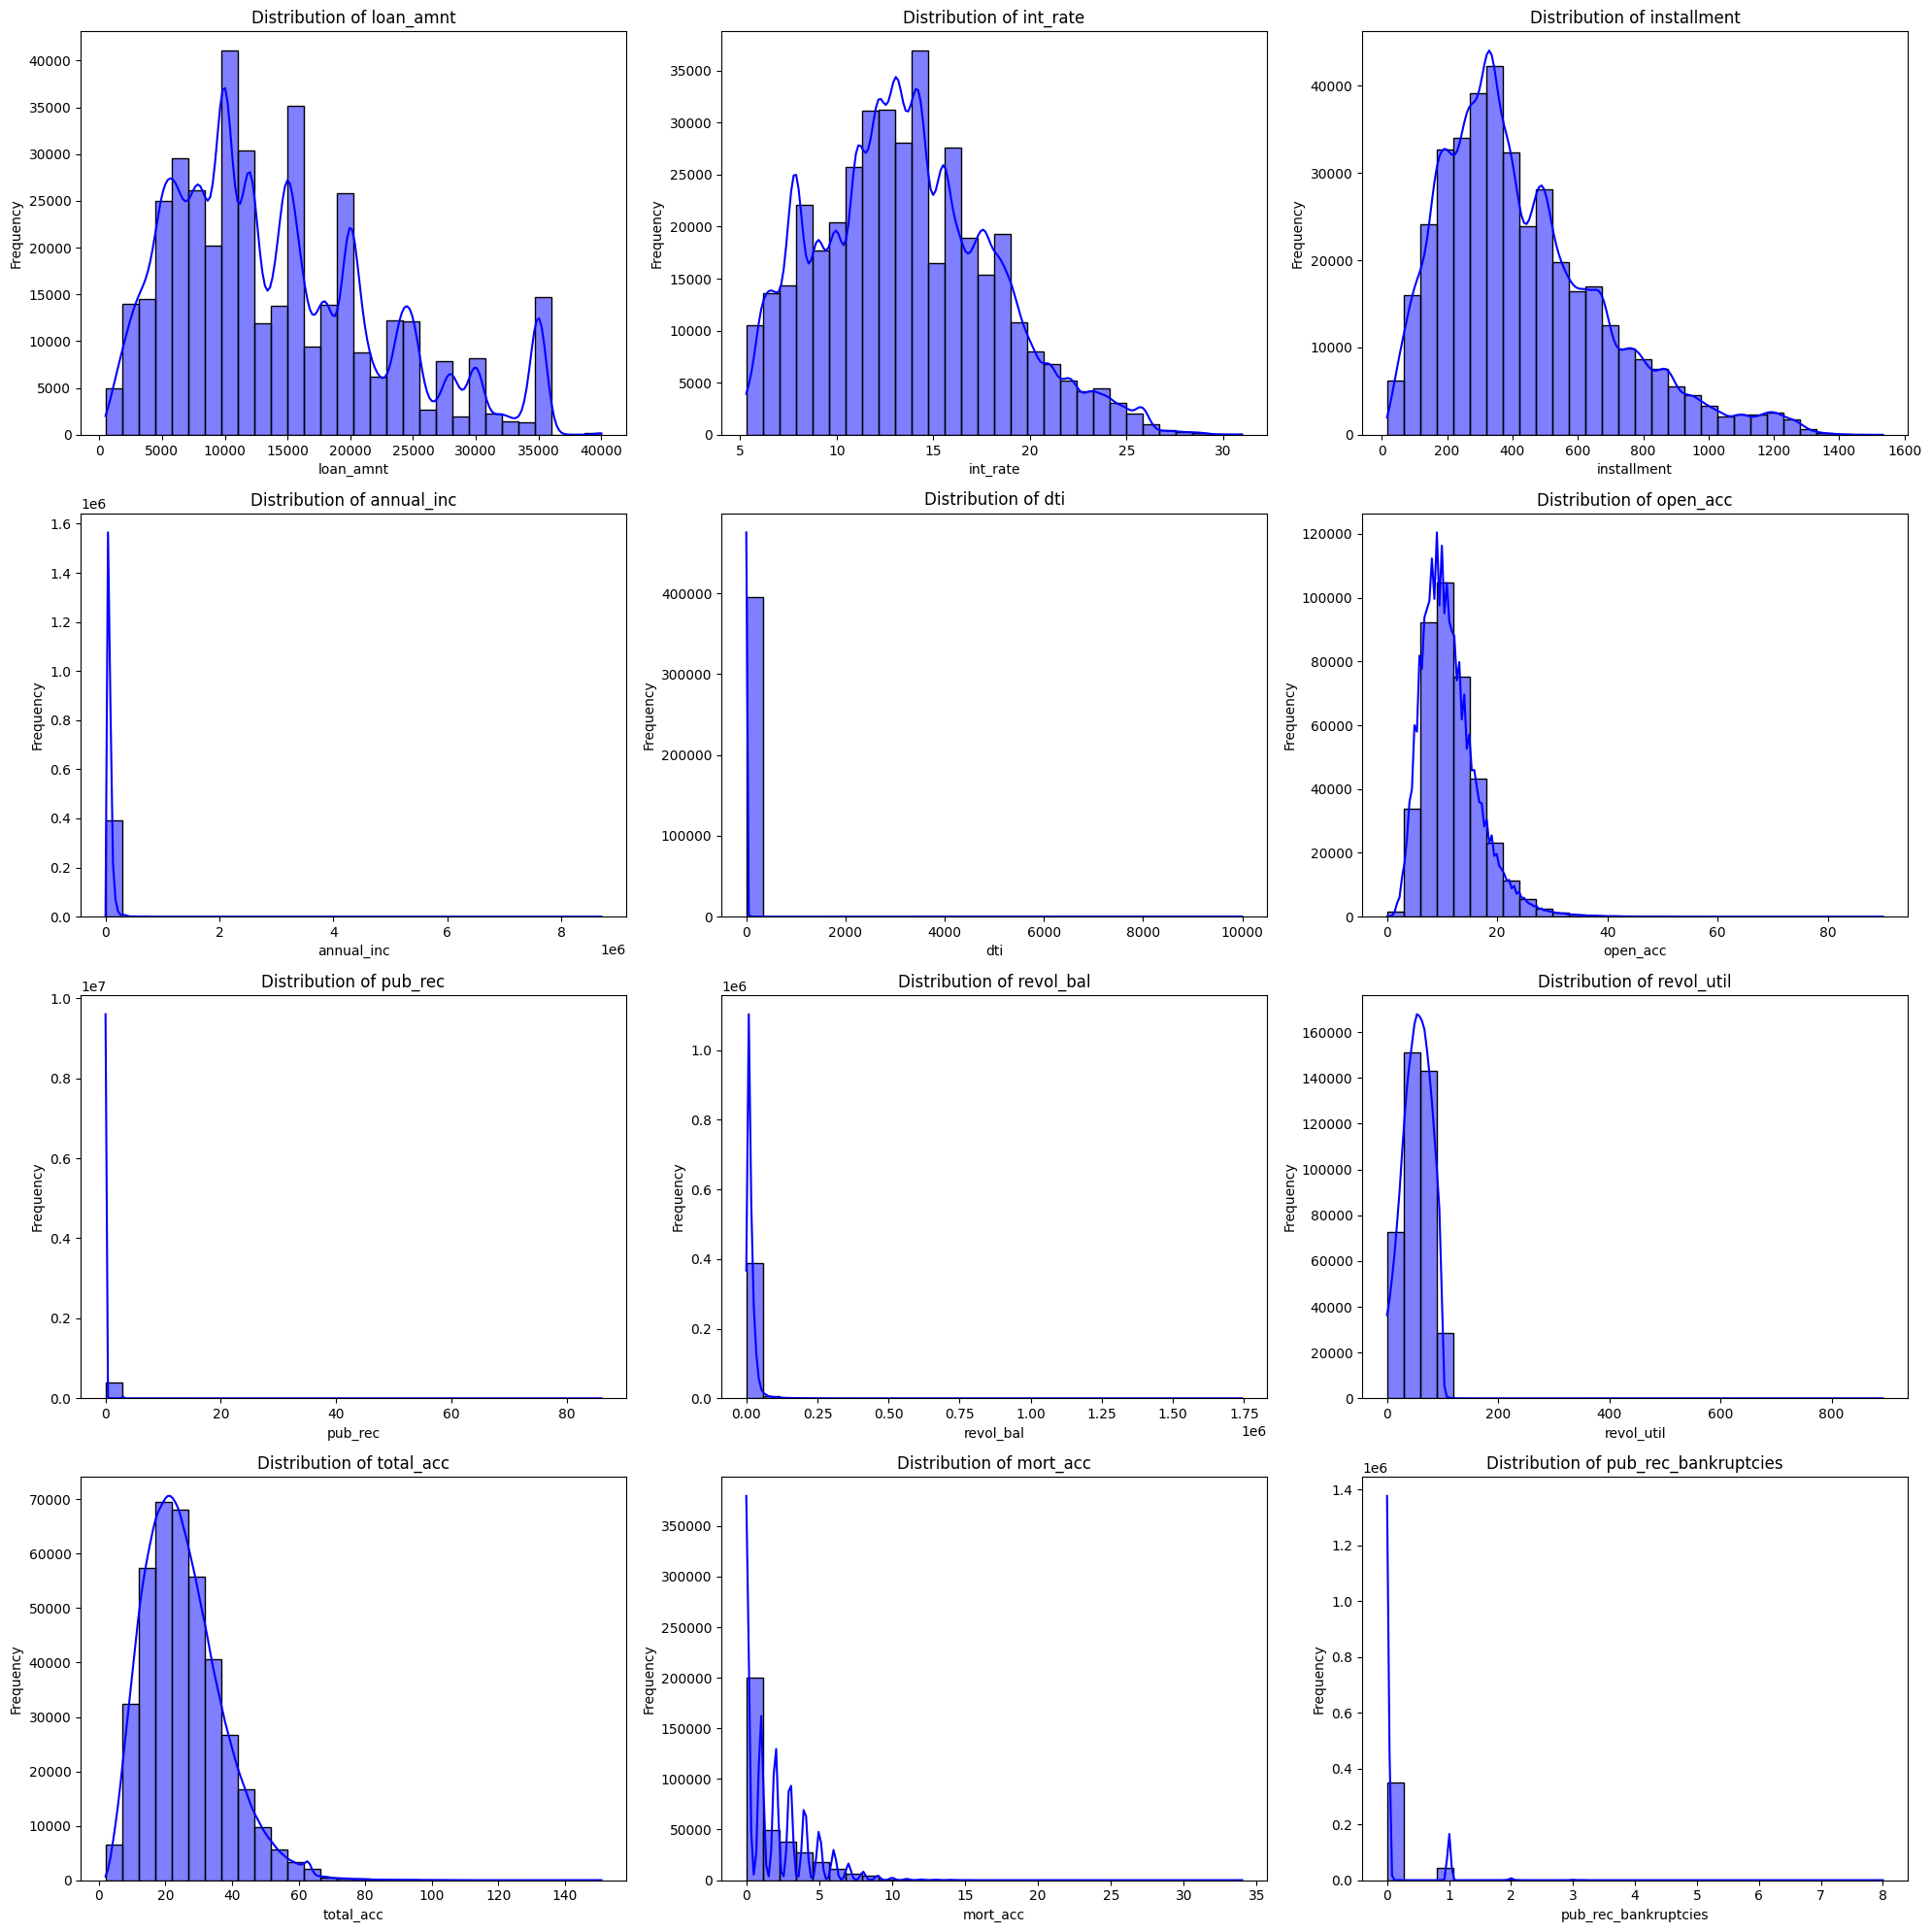

In [ ]:
# List of continuous variables
continuous_vars = [
    "loan_amnt", "int_rate", "installment", "annual_inc", "dti",
    "open_acc", "pub_rec", "revol_bal", "revol_util",
    "total_acc", "mort_acc", "pub_rec_bankruptcies"
]

# Number of rows and columns for subplots
n_cols = 3
n_rows = (len(continuous_vars) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes for easy iteration

for i, var in enumerate(continuous_vars):
    sns.histplot(data=df, x=var, kde=True, bins=30, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Inference and Recommendation**

> **Loan Amount (`loan_amnt`)**

- **Inference:** The distribution of loan amounts is multimodal, with noticeable peaks around ₹10,000, ₹15,000, and ₹20,000. A significant number of loans are clustered at these amounts, indicating potential borrower preferences.

- **Recommendation:** Segment loan products based on these common amounts to create tailored financial solutions and marketing strategies.

> **Interest Rate (`int_rate`)**

- **Inference:** The interest rate distribution is unimodal and right-skewed, with most rates falling between 10% and 20%.

- **Recommendation:** Optimize interest rates within this range to enhance competitiveness and borrower appeal.

> **Installment (`installment`)**

- **Inference:** Installment amounts are right-skewed, with most values concentrated between ₹200 and ₹600.

- **Recommendation:** Design installment plans to align with these common amounts, ensuring affordability and reducing default risks.

> **Annual Income (`annual_inc`)**

- **Inference:** The annual income distribution is highly right-skewed, with most incomes below ₹200,000 and a few outliers at much higher values.

- **Recommendation:** Apply a logarithmic transformation to improve income data analysis and tailor financial products for specific income brackets.

> **Debt-to-Income Ratio (`dti`)**

- **Inference:** The DTI distribution is right-skewed, with the majority of values below 40.

- **Recommendation:** Establish stricter lending criteria for borrowers with higher DTI ratios to mitigate default risks.

> **Number of Open Accounts (`open_acc`)**

- **Inference:** The distribution of open accounts is right-skewed, with most individuals having fewer than 20 open accounts.

- **Recommendation:** Closely monitor borrowers with many open accounts, as they may pose higher credit risks.

> **Number of Public Records (`pub_rec`)**

- **Inference:** The distribution of public records is highly right-skewed, with most individuals having zero public records.

- **Recommendation:** Focus on borrowers with no public records, as they represent lower risk profiles.

> **Revolving Balance (`revol_bal`)**

- **Inference:** The revolving balance distribution is highly right-skewed, with most balances below ₹50,000.

- **Recommendation:** Offer financial counseling to borrowers with high revolving balances to help them manage debt more effectively.

> **Revolving Utilization Rate (`revol_util`)**

- **Inference:** The revolving utilization rate is right-skewed, with most values below 100%.

- **Recommendation:** Encourage borrowers to maintain lower utilization rates to improve credit scores and reduce default risks.

> **Total Number of Accounts (`total_acc`)**

- **Inference:** The total number of accounts is right-skewed, with most individuals having fewer than 60 accounts.

- **Recommendation:** Use this variable as a key factor in assessing borrower creditworthiness.

> **Number of Mortgage Accounts (`mort_acc`)**

- **Inference:** The number of mortgage accounts is right-skewed, with most individuals having fewer than 5 mortgage accounts.

- **Recommendation:** Consider the number of mortgage accounts when evaluating loan applications, as it may indicate financial stability.

> **Number of Public Record Bankruptcies (`pub_rec_bankruptcies`)**

- **Inference:** The distribution of public record bankruptcies is highly right-skewed, with most individuals having zero bankruptcies.

- **Recommendation:** Prioritize lending to individuals with no history of bankruptcies to minimize default risks.

#### **Categorical Variables**

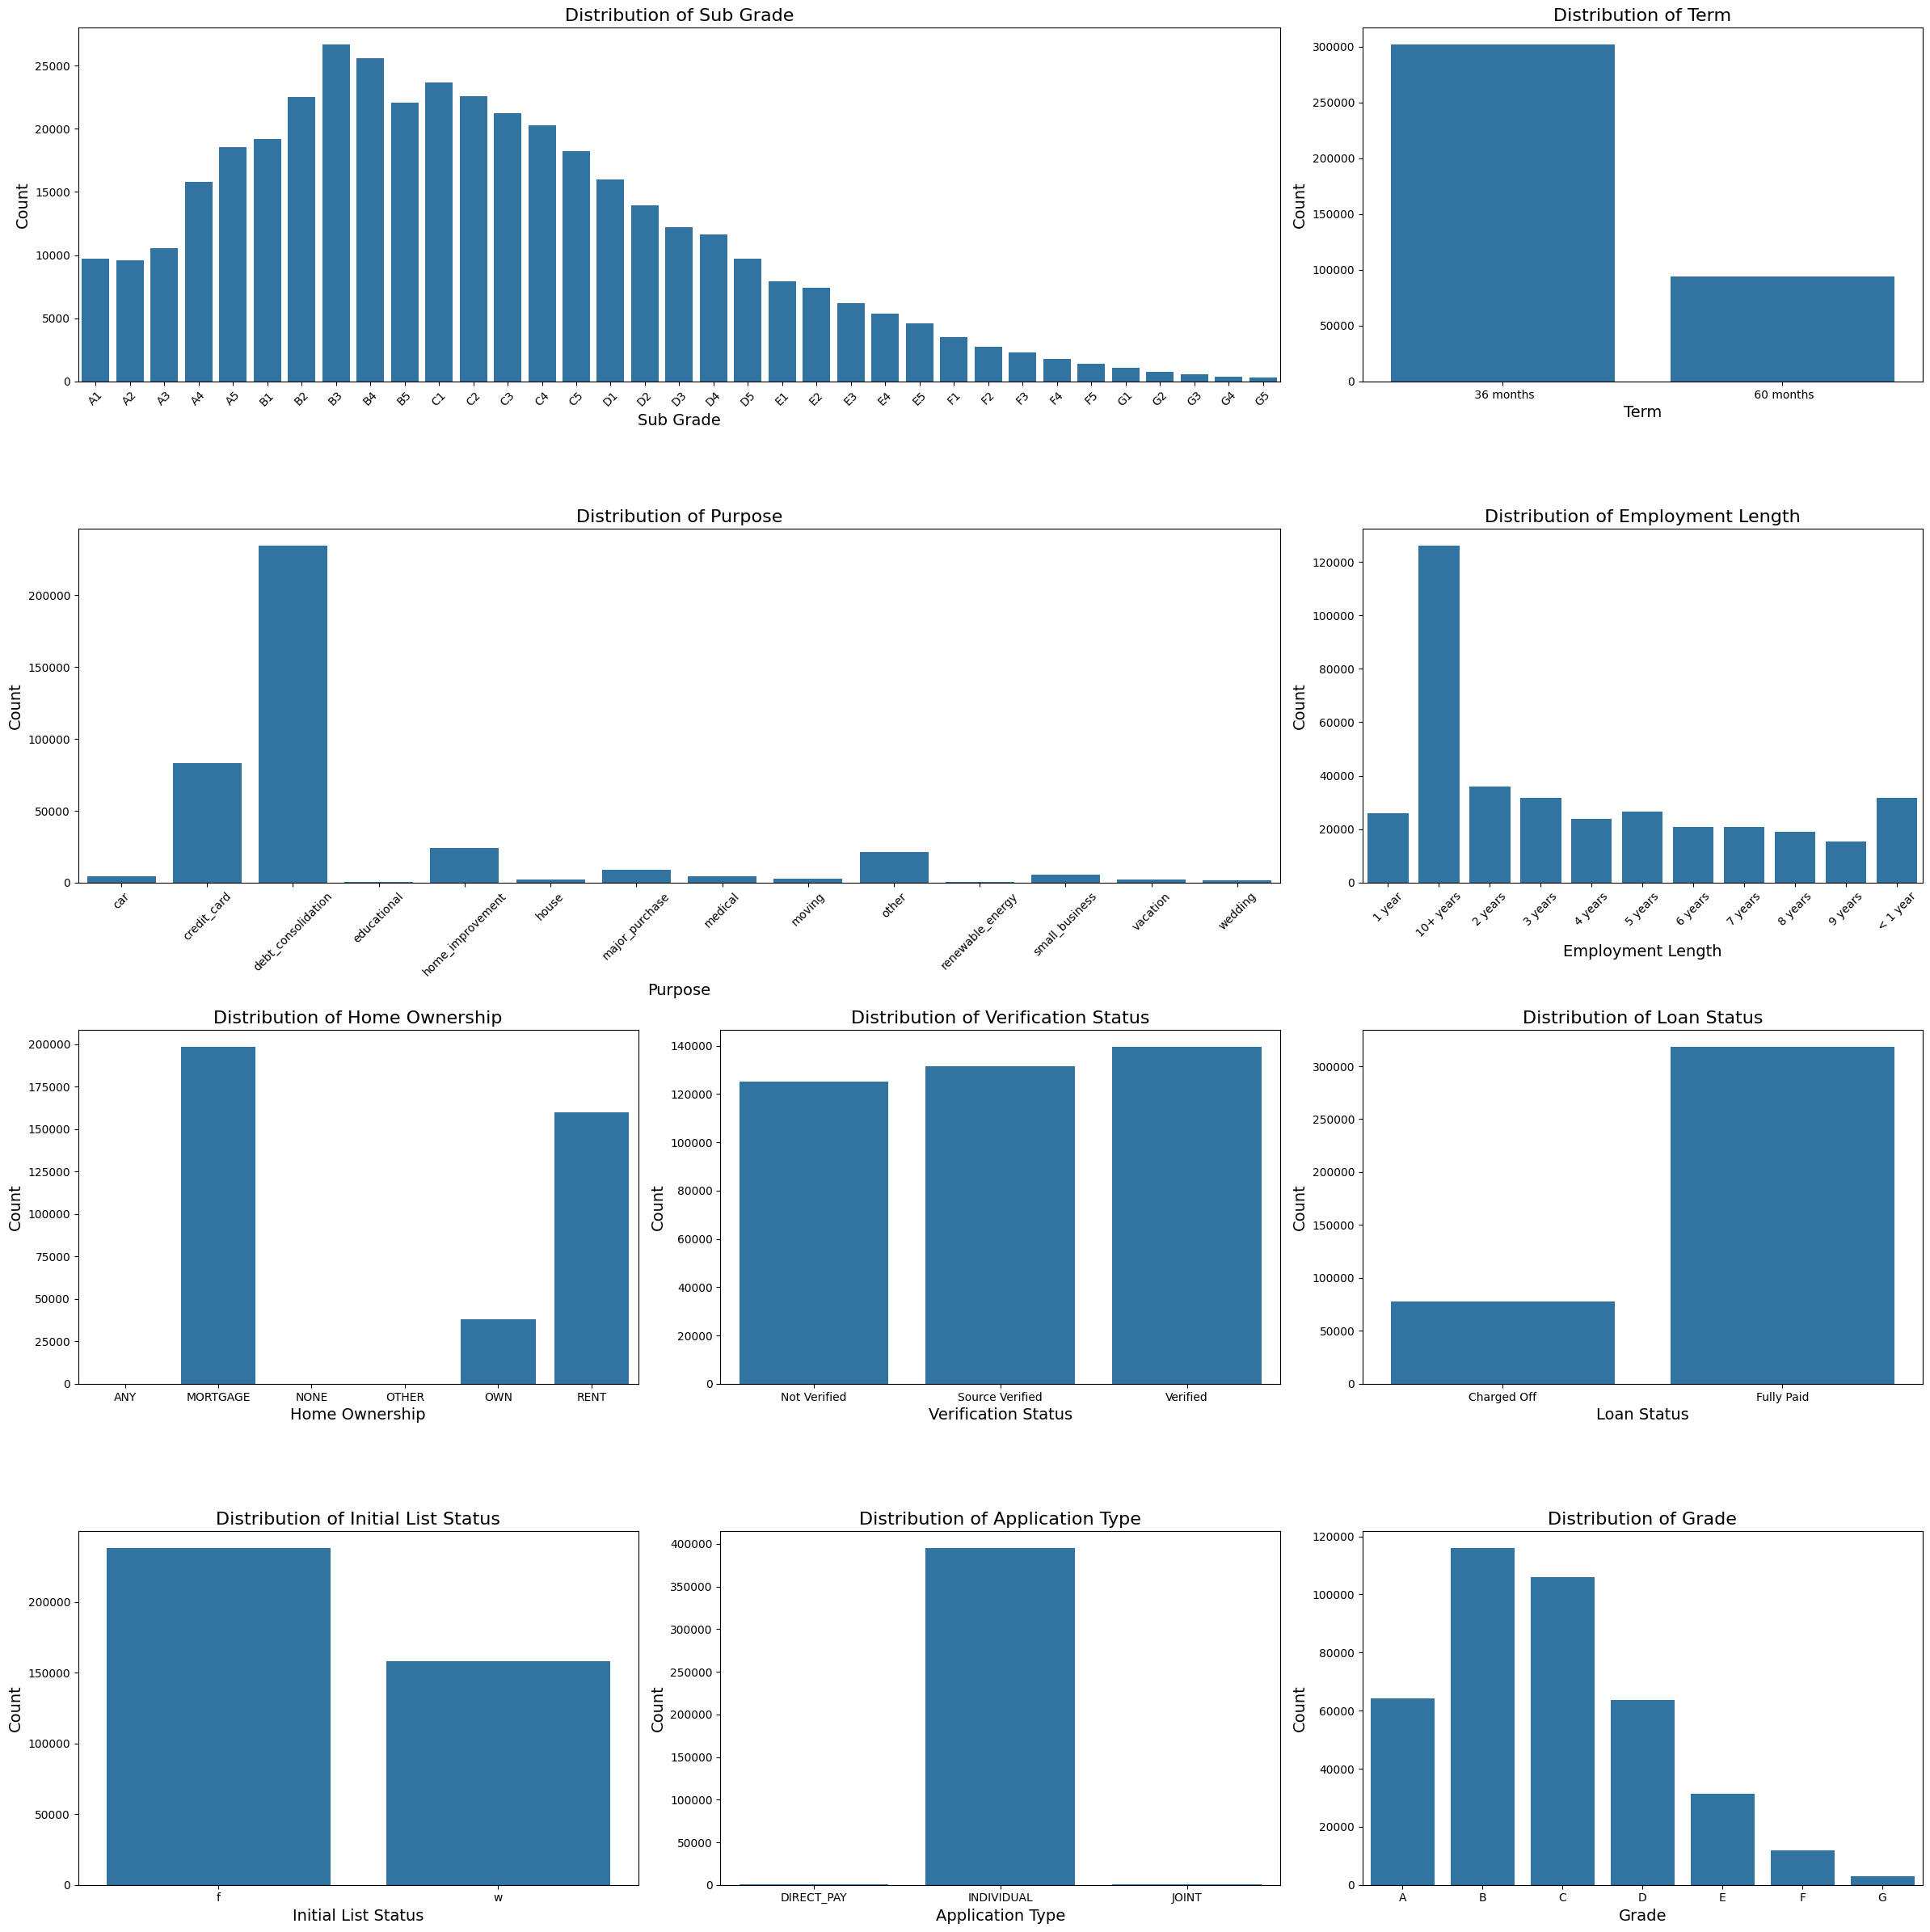

In [ ]:
# Set up the figure with 4 rows and 3 columns
plt.figure(figsize=(24, 24))

# First Row - sub_grade takes 2 columns, term takes 1 column
plt.subplot2grid((4, 3), (0, 0), colspan=2)
sns.countplot(x='sub_grade', data=df)
plt.title('Distribution of Sub Grade', fontsize=16)
plt.xlabel('Sub Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

plt.subplot2grid((4, 3), (0, 2))
sns.countplot(x='term', data=df)
plt.title('Distribution of Term', fontsize=16)
plt.xlabel('Term', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Second Row - purpose takes 2 columns, emp_length takes 1 column
plt.subplot2grid((4, 3), (1, 0), colspan=2)
sns.countplot(x='purpose', data=df)
plt.title('Distribution of Purpose', fontsize=16)
plt.xlabel('Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

plt.subplot2grid((4, 3), (1, 2))
sns.countplot(x='emp_length', data=df)
plt.title('Distribution of Employment Length', fontsize=16)
plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Third Row - 3 plots (each in 1 column)
plt.subplot2grid((4, 3), (2, 0))
sns.countplot(x='home_ownership', data=df)
plt.title('Distribution of Home Ownership', fontsize=16)
plt.xlabel('Home Ownership', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot2grid((4, 3), (2, 1))
sns.countplot(x='verification_status', data=df)
plt.title('Distribution of Verification Status', fontsize=16)
plt.xlabel('Verification Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot2grid((4, 3), (2, 2))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Fourth Row - 3 plots (each in 1 column)
plt.subplot2grid((4, 3), (3, 0))
sns.countplot(x='initial_list_status', data=df)
plt.title('Distribution of Initial List Status', fontsize=16)
plt.xlabel('Initial List Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot2grid((4, 3), (3, 1))
sns.countplot(x='application_type', data=df)
plt.title('Distribution of Application Type', fontsize=16)
plt.xlabel('Application Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Plot the remaining column (for example, 'grade' if it's left)
plt.subplot2grid((4, 3), (3, 2))
sns.countplot(x='grade', data=df)
plt.title('Distribution of Grade', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

**Inference and Recommendation**

> **Term (`term`)**

- **Inference:** Most loans have a term of 36 months, indicating a preference for shorter repayment periods.

- **Recommendation:** Consider promoting the benefits of 60-month loans to balance the portfolio and offer more flexible repayment options to borrowers.

> **Grade (`grade`)**

- **Inference:** Grades B and C are the most common, suggesting that LoanTap approves a moderate level of risk.

- **Recommendation:** Ensure robust risk management strategies for these grades, and explore opportunities to support and possibly improve the creditworthiness of applicants in lower grades.

> **Sub-Grade (`sub_grade`)**

- **Inference:** Sub-grades within B and C are also the most prevalent, with a noticeable distribution among them.

- **Recommendation:** Tailor specific financial products and services to the sub-grades within B and C to better meet the needs of these borrowers.

> **Employment Length (`emp_length`)**

- **Inference:** The highest count of borrowers has 10 or more years of employment, indicating a preference for stable, long-term employment.

- **Recommendation:** Continue to prioritize applicants with longer employment histories to reduce default risk and consider incentives for those with shorter tenures to improve stability.

> **Home Ownership (`home_ownership`)**

- **Inference:** Most borrowers either rent or have a mortgage.

- **Recommendation:** Develop specialized loan products for renters and homeowners with mortgages, as they form the majority of the applicant pool.

> **Verification Status (`verification_status`)**

- **Inference:** The counts are relatively similar across not verified, source verified, and verified statuses.

- **Recommendation:** Ensure that verification processes are streamlined and effective, regardless of the status, to maintain consistency in risk assessment.

> **Loan Status (`loan_status`)**

- **Inference:** The majority of loans are fully paid, indicating a strong repayment performance.

- **Recommendation:** Highlight this success rate in marketing materials to attract new borrowers and reinforce trust in the LoanTap brand.

> **Purpose (`purpose`)**

- **Inference:** Debt consolidation is the most common purpose for loans, followed by credit card and home improvement.

- **Recommendation:** Focus marketing efforts on these popular loan purposes and develop targeted financial education materials to assist borrowers with debt management.

> **Initial List Status (`initial_list_status`)**

- **Inference:** The majority of loans have an initial list status of 'f'.

- **Recommendation:** Investigate the reasons behind this distribution and adjust listing strategies if needed to optimize loan approval and funding processes.

> **Application Type (`application_type`)**

- **Inference:** Individual applications dominate the dataset.

- **Recommendation:** Explore opportunities to encourage joint applications or co-borrowers, which might offer additional security and reduce default risk.

### **Bivariate Analysis**

#### **Continuous vs. Continuous**

##### **Relationship between annual_income and loan_amount**

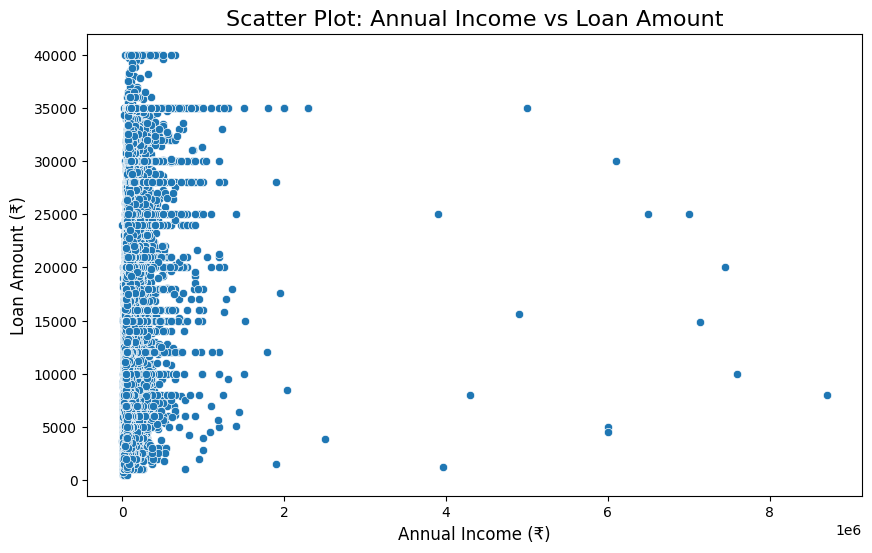

In [ ]:
# Scatter plot to visualize the relationship between 'annual_inc' and 'loan_amnt'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df)
plt.title('Scatter Plot: Annual Income vs Loan Amount', fontsize=16)
plt.xlabel('Annual Income (₹)', fontsize=12)
plt.ylabel('Loan Amount (₹)', fontsize=12)
plt.show()

**Inferences:**
- Most borrowers have lower annual incomes and loan amounts.
- A few outliers show higher annual incomes and larger loans.
- The relationship between income and loan amount is weakly positive.

**Recommendations:**
- Focus marketing on lower income borrowers and offer accessible loan amounts.
- Develop specialized products for high-income individuals needing larger loans.
- Provide financial education to help lower-income borrowers manage finances.
- Perform thorough risk assessments for high-income outliers.
- Tailor loan offerings based on income segments.

##### **How dti (Debt-to-Income ratio) impacts installment values**

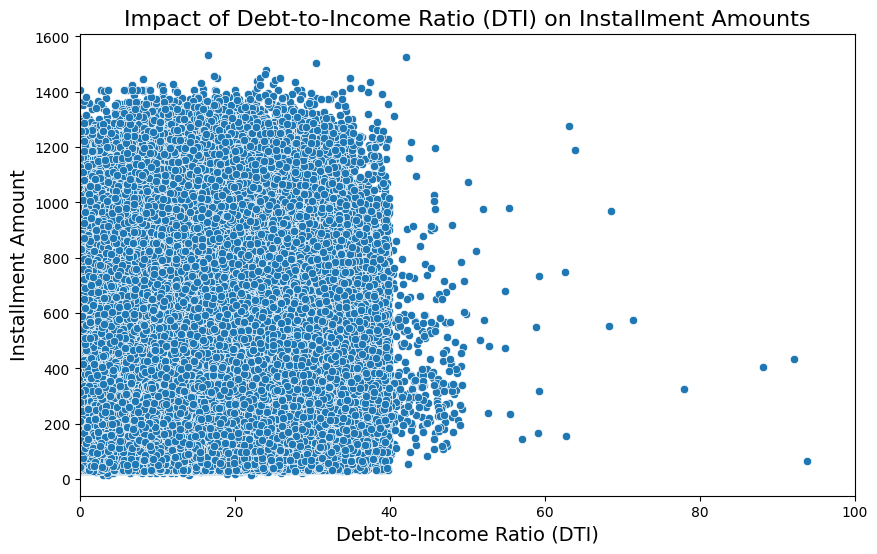

In [ ]:
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the relationship between dti and installment
sns.scatterplot(x='dti', y='installment', data=df)

# Add title and labels
plt.title('Impact of Debt-to-Income Ratio (DTI) on Installment Amounts', fontsize=16)
plt.xlabel('Debt-to-Income Ratio (DTI)', fontsize=14)
plt.ylabel('Installment Amount', fontsize=14)
plt.xlim(0, 100)

# Display the plot
plt.show()

**Inferences:**
- Most borrowers have a Debt-to-Income Ratio (DTI) below 40.
- Installment amounts are spread across a wide range for lower DTI values.
- There are fewer borrowers with higher DTI values.
- Some outliers have very high DTI values and varying installment amounts.
- The relationship between DTI and installment amount shows more data points at lower DTI values.

**Recommendations:**
- Focus lending efforts on borrowers with a DTI below 40.
- Develop loan products catering to borrowers with lower DTI values, offering flexible installment plans.
- Implement stricter risk assessments for borrowers with higher DTI values.
- Offer financial counseling to borrowers with high DTI to help them manage their debt.
- Customize loan offerings based on DTI segments to meet specific borrower needs effectively.


#### **Categorical vs. Continuous**

##### **How loan_status (Fully Paid vs. Charged Off) influences loan_amnt**

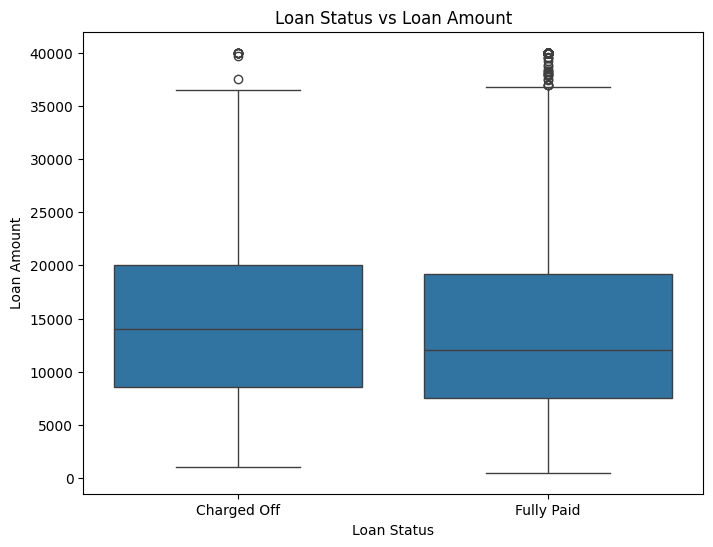

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

**Inferences:**

- The median loan amount for both "Charged Off" and "Fully Paid" loans is similar, around 12,000 to 13,000.
- The interquartile range (IQR) for "Charged Off" loans is slightly larger than for "Fully Paid" loans, indicating more variability in loan amounts for "Charged Off" loans.
- There are more outliers in the "Fully Paid" category compared to the "Charged Off" category, suggesting some exceptionally high loan amounts were fully paid off.
- The overall range of loan amounts is similar for both categories, extending up to around 40,000.

**Recommendations:**

- Further analyze why certain loans are charged off while others are fully paid, especially focusing on the outliers.
- Investigate other factors that might influence loan status, such as borrower credit score, income, or loan purpose.
- Consider implementing stricter lending criteria or additional support for higher loan amounts to reduce the risk of loans being charged off.
- Use this data to refine risk assessment models to better predict and manage the likelihood of loans being charged off.


##### **Distribution of loan_amount across home_ownership categories**

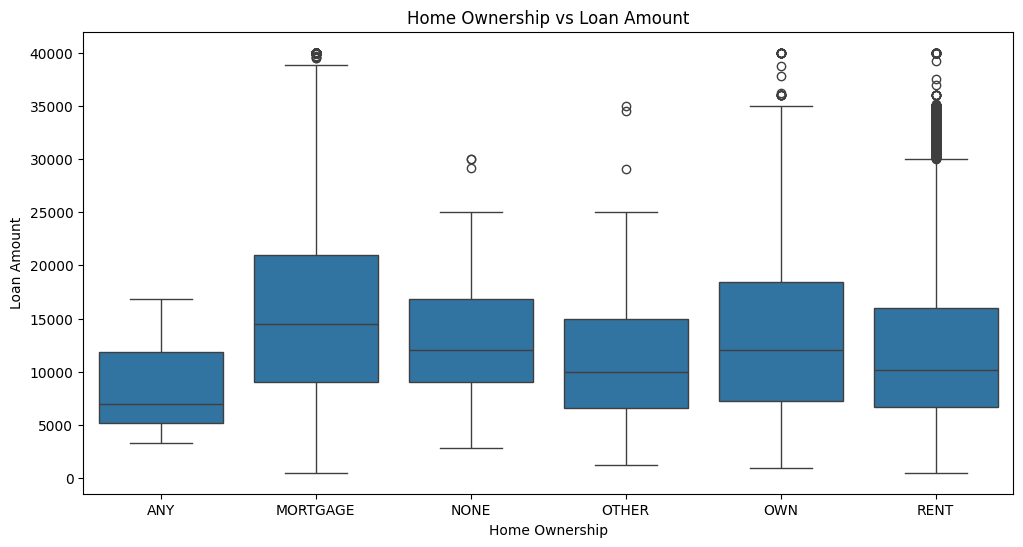

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='home_ownership', y='loan_amnt', data=df)
plt.title('Home Ownership vs Loan Amount')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

**Inferences:**

- Borrowers with a mortgage generally have higher median loan amounts.
- Renters tend to have slightly lower median loan amounts compared to homeowners.
- The category "ANY" has a wide range of loan amounts, showing high variability.
- Outliers are present across all home ownership categories, indicating exceptional loan amounts.
- Homeowners ("OWN") have a narrower range of loan amounts compared to other categories.

**Recommendations:**

- Consider offering specialized loan products for borrowers with mortgages due to their higher loan amounts.
- Develop targeted financial products for renters to meet their specific needs.
- Investigate the high variability in the "ANY" category to better understand borrower profiles.
- Monitor outliers closely to ensure appropriate risk management.
- Tailor loan offerings based on home ownership status to provide more personalized lending options.


#### **Categorical vs. Categorical**

##### **Relationship between loan_status and home_ownership**

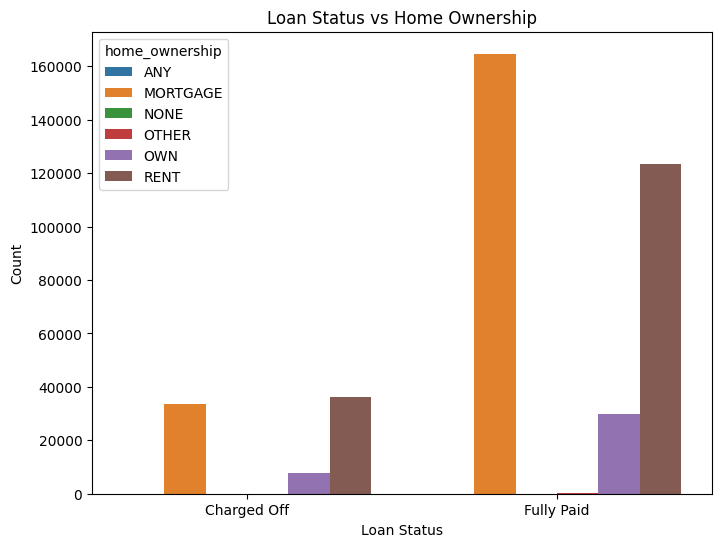

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', hue='home_ownership', data=df)
plt.title('Loan Status vs Home Ownership')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

**Inferences:**

- Borrowers with a mortgage have the highest count of fully paid loans.
- Renters also show a high count of fully paid loans.
- The "Charged Off" status is more prevalent among borrowers with a mortgage and renters.
- The categories "OWN" and "NONE" have fewer loan accounts overall.
- The "ANY" and "OTHER" categories show minimal impact on loan status.

**Recommendations:**

- Focus on supporting borrowers with mortgages and renters, as they form the majority of both fully paid and charged-off loans.
- Develop targeted loan products and financial counseling for mortgage holders and renters to improve repayment rates.
- Investigate the reasons behind the higher charge-off rates among these groups to enhance risk management.
- Consider promotional strategies for the "OWN" and "NONE" categories to diversify the borrower base.
- Monitor the "ANY" and "OTHER" categories closely, although they have minimal impact on overall loan performance.


##### **Association between loan_status and verification_status**

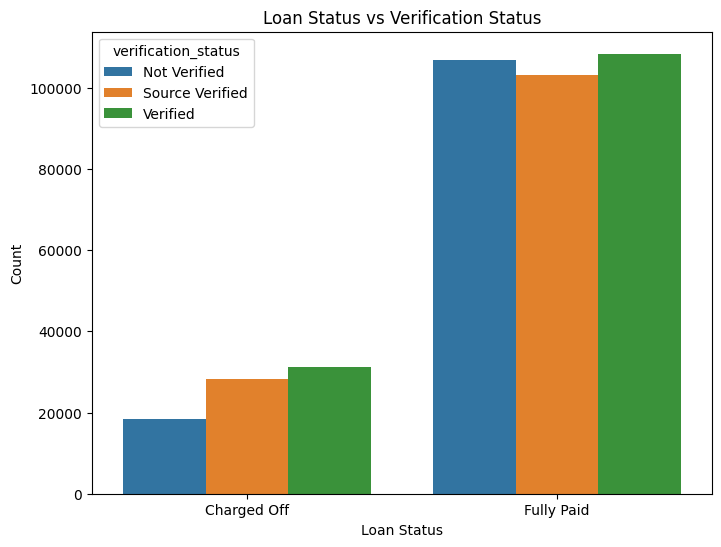

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', hue='verification_status', data=df)
plt.title('Loan Status vs Verification Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

**Inferences:**

- Majority of loans are "Fully Paid," with "Verified" loans having the highest count.
- "Source Verified" and "Verified" loans have higher counts of "Charged Off" status compared to "Not Verified."
- "Not Verified" loans have the lowest count in both "Fully Paid" and "Charged Off" categories.
- Verification seems to play a role in loan outcomes, with "Verified" loans being the most common overall.

**Recommendations:**

- Strengthen the verification process to ensure higher accuracy in assessing borrower creditworthiness.
- Focus on reducing charge-offs among "Source Verified" and "Verified" loans by implementing additional risk management measures.
- Encourage borrowers to undergo the verification process to improve loan performance and reduce defaults.
- Analyze the factors contributing to charge-offs in "Verified" loans to enhance underwriting strategies.
- Promote transparency and trust by highlighting the benefits of loan verification to potential borrowers.


### **Correlation Analysis**

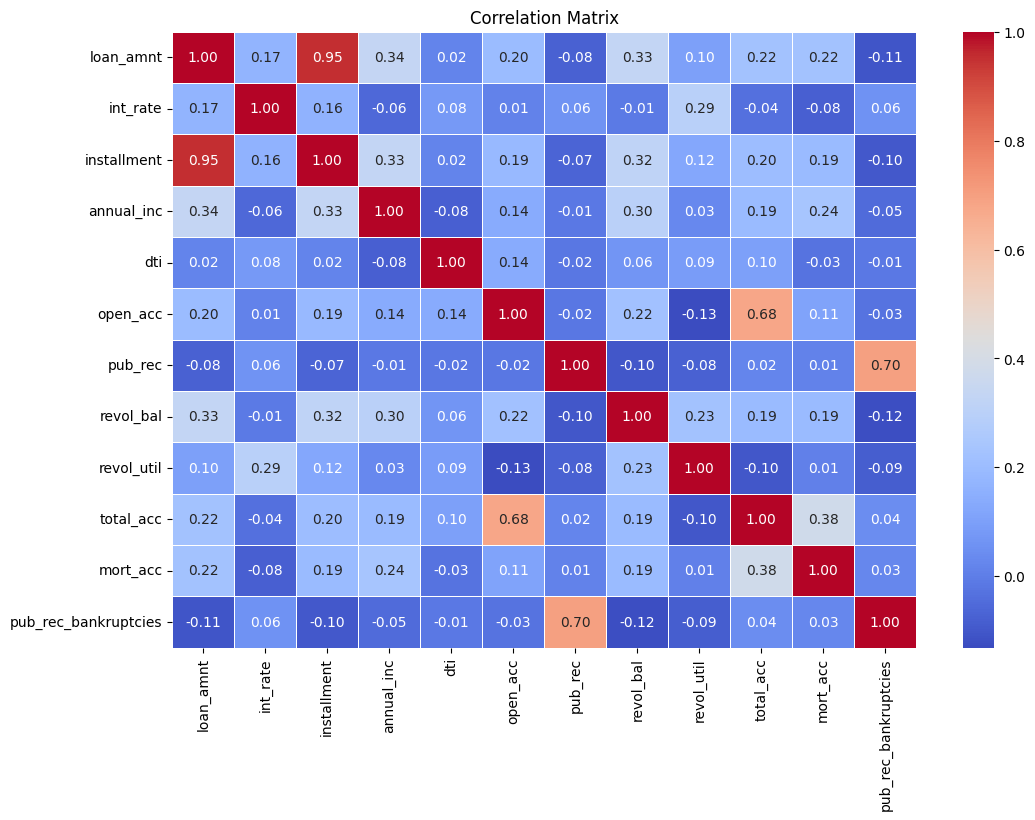

In [ ]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

> **Inferences from the Correlation Matrix**

1. **Loan Amount and Installment**:  
   There's a very strong positive correlation (0.95) between loan amount and installment. This implies that higher loan amounts are associated with higher installment payments.

2. **Public Records and Bankruptcies**:  
   The correlation between public record bankruptcies and public records is strong (0.70). Borrowers with a higher number of derogatory public records are more likely to have public record bankruptcies.

3. **Total Credit Lines and Open Credit Lines**:  
   There is a moderate positive correlation (0.68) between the total number of credit lines and the number of open credit lines. Borrowers with more credit lines tend to have more open credit lines.

---

> **Recommendations**

1. **Assess Loan Amounts Carefully**:  
   Given the strong correlation between loan amounts and installments, financial institutions should ensure that loan amounts are aligned with borrowers' repayment capacities. Large loans with high installment payments might increase the risk of default if not managed well.

2. **Monitor Derogatory Public Records**:  
   Since there's a strong correlation between public records and bankruptcies, lenders should closely monitor derogatory public records when assessing borrower risk. Implementing stricter criteria or additional verification processes for borrowers with a high number of public records could help mitigate risk.

3. **Evaluate Credit Line Management**:  
   The moderate correlation between total credit lines and open credit lines suggests that borrowers with numerous credit lines tend to keep many of them open. Financial institutions should consider the potential impact of multiple open credit lines on the borrower's overall creditworthiness and debt management.

4. **Focus on Risk Profiles**:  
   Use the correlation matrix to identify key indicators that might affect a borrower’s risk profile. For example, higher debt-to-income ratios and higher revolving utilization rates could be red flags that require further investigation.

5. **Tailor Financial Products**:  
   Based on the correlations observed, lenders can develop tailored financial products that better suit different borrower segments. For instance, customized loan repayment plans for borrowers with high debt-to-income ratios or revolving balances could be beneficial.


In [ ]:
# Dropping 'installment' column due to high correlation with 'loan_amount'
df.drop('installment', axis=1, inplace=True)

## **Data Preprocessing**

### **Duplicate Value Check**

In [ ]:
# Checking the number of duplicate for all the features
duplicate_records = df[df.duplicated()]
print(f"Number of duplicate records: {duplicate_records.shape[0]}")

Number of duplicate records: 0


### **Missing Value Treatment**

In [ ]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values[null_values['null_count']>0]

,index,null_count
0,mort_acc,37795
1,emp_title,22927
2,emp_length,18301
3,title,1756
4,pub_rec_bankruptcies,535
5,revol_util,276


#### **Handling missing value in `emp_length`**

In [ ]:
# Create income bins (categorical)
bins = [-1, 30000, 60000, 100000, 150000, 200000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High', 'Ultra High', 'Super High']

df['income_group'] = pd.cut(df['annual_inc'], bins=bins, labels=labels)

# Impute missing emp_length using the mode within each income group
df['emp_length'] = df.groupby('income_group')['emp_length'].transform(lambda x: x.fillna(x.mode()[0]))

# Drop the 'income_group' column as it's no longer needed
df.drop('income_group', axis=1, inplace=True)

#### **Handling missing value in `pub_rec_bankruptcies`**

In [ ]:
df['pub_rec_bankruptcies'] = df.groupby(['pub_rec', 'loan_status'])['pub_rec_bankruptcies'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

#### **Handling missing value in `revol_util`**

In [ ]:
# Impute with revol_bal first
df['revol_util'] = df.groupby('revol_bal')['revol_util'].transform(lambda x: x.fillna(x.median()))

# Then impute using int_rate
df['revol_util'] = df.groupby('int_rate')['revol_util'].transform(lambda x: x.fillna(x.median()))

#### **Handling missing value in `mort_acc`**

In [ ]:
df['mort_acc'] = df.groupby(['total_acc', 'annual_inc'])['mort_acc'].transform(lambda x: x.fillna(x.median()))
df['mort_acc'] = df.groupby('total_acc')['mort_acc'].transform(lambda x: x.fillna(x.median()))

#### **Handling missing value in `emp_title` and `title`**

In [ ]:
df['emp_title'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)

In [ ]:
# Veryfying count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

,index,null_count
0,loan_amnt,0
1,term,0
2,pub_rec_bankruptcies,0
3,mort_acc,0
4,application_type,0
5,initial_list_status,0
6,total_acc,0
7,revol_util,0
8,revol_bal,0
9,pub_rec,0


### **Outlier Treatment**

In [ ]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

11

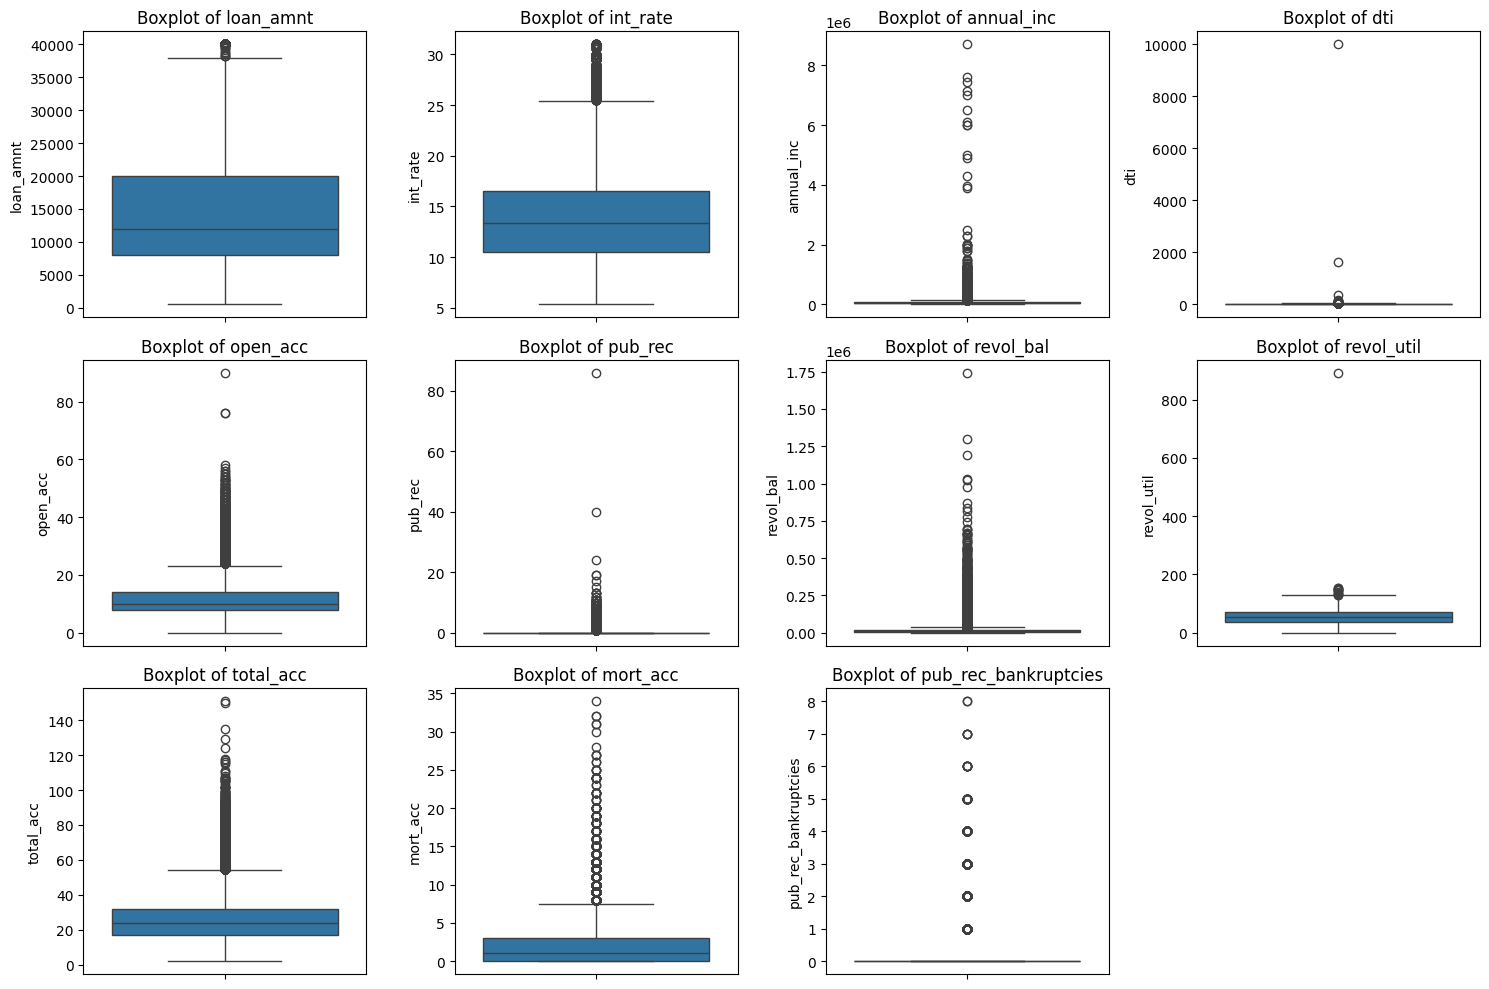

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

> **Inferences from the Boxplots**

- **Loan Amount**: Most loans range between ₹5,000 and ₹20,000, with a median around ₹12,000. There are a few outliers above ₹35,000.
  
- **Interest Rate**: Interest rates generally fall between 5% and 30%, with a median around 13%. Some loans have rates exceeding 30%.
  
- **Annual Income**: Annual incomes are mostly below ₹200,000, with a median around ₹60,000. There are significant outliers above ₹1,000,000.
  
- **Debt-to-Income Ratio (DTI)**: Most DTI ratios are below 50, with a median around 15. There are extreme outliers above 2,000.
  
- **Number of Open Credit Lines**: The number of open credit lines is usually below 20, with a median around 10. There are many outliers above 80.
  
- **Derogatory Public Records**: Most borrowers have zero derogatory public records, with some outliers above 20.
  
- **Revolving Balance**: Revolving balances are mostly below ₹50,000, with a median around ₹10,000. There are significant outliers above ₹1,000,000.
  
- **Revolving Line Utilization Rate**: Utilization rates are mainly below 100%, with a median around 50%. There are outliers above 200%.
  
- **Total Number of Credit Lines**: Typically, total credit lines are below 50, with a median around 25. Many outliers exist above 140.
  
- **Number of Mortgage Accounts**: Most borrowers have fewer than 10 mortgage accounts, with a median around 2. There are outliers above 30.
  
- **Number of Public Record Bankruptcies**: Most borrowers have zero public record bankruptcies, with a few outliers above 6.


In [ ]:
def remove_outliers_iqr(df, numerical_columns):

    for i, column in enumerate(numerical_columns, 1):
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip the column data to the calculated bounds
        df[column] = np.clip(df[column], lower_bound, upper_bound)

    # Return the modified DataFrame
    return df

df = remove_outliers_iqr(df, num_cols)

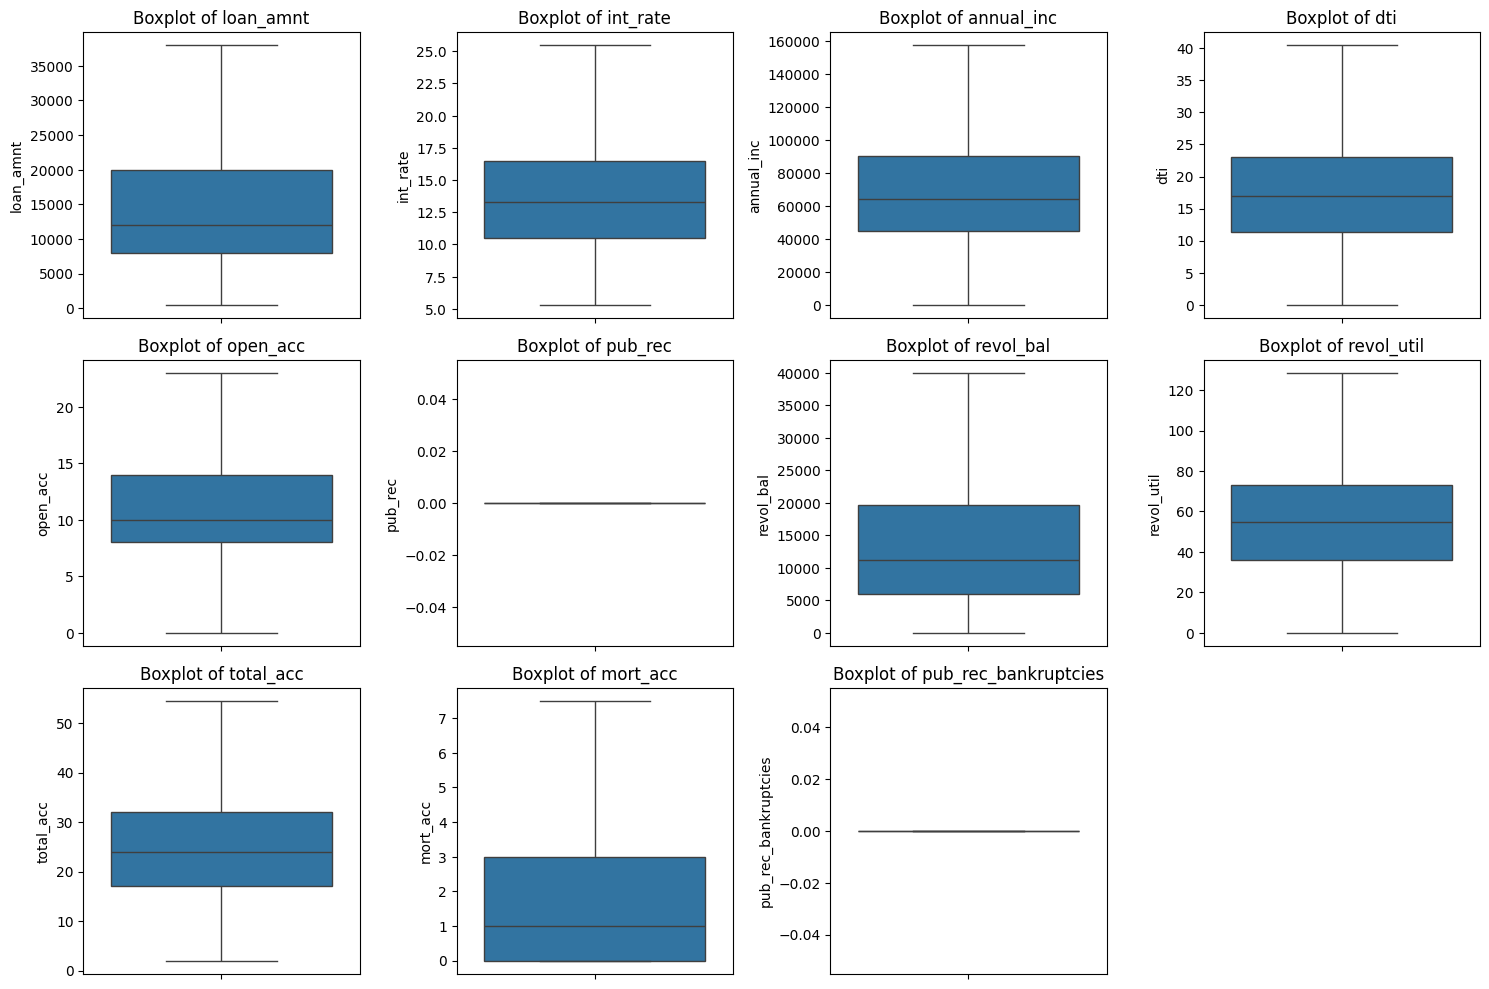

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### **Feature Engineering and Encoding**

#### **Mapping of `pub_rec`**

In [ ]:
def pub_rec(number):
  if number == 0.0:
    return 0
  else:
    return 1

df['pub_rec'] = df.pub_rec.apply(pub_rec)

#### **Mapping of `mort_acc`**

In [ ]:
def mort_acc(number):
  if number == 0.0:
    return 0
  elif number >= 1.0:
    return 1
  else:
    return number

df['mort_acc'] = df.mort_acc.apply(mort_acc)

#### **Mapping of `pub_rec_bankruptcies`**

In [ ]:
def pub_rec_bankruptcies(number):
  if number == 0.0:
    return 0
  elif number >= 1.0:
    return 1
  else:
    return number

df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

#### **Mapping of `loan_status`**

In [ ]:
# Mapping of Target Variable
target_mapping = {
    'Fully Paid': 0,
    'Charged Off': 1
}
df['loan_status'] = df['loan_status'].map(target_mapping)

In [ ]:
# Convert loan_status to integer
df['loan_status'] = df['loan_status'].astype(int)

#### **Extracting month for `issue_d` and `earliest_cr_line`**

In [ ]:
# Extract month in numerical form
df['issue_d'] = df['issue_d'].dt.month
df['earliest_cr_line'] = df['earliest_cr_line'].dt.month

In [ ]:
# Convert issue_d and earliest_cr_line to integer
df['issue_d'] = df['issue_d'].astype(int)
df['earliest_cr_line'] = df['earliest_cr_line'].astype(int)

#### **Deriving state or region from `address` fields**

In [ ]:
# Extract city
df['city'] = df['address'].str.extract(r'[\r\n](.*?),\s[A-Z]{2}\s\d{5}')

# Extract state
df['state'] = df['address'].str.extract(r',\s([A-Z]{2})\s\d{5}')

# Extract ZIP code
df['zip_code'] = df['address'].str.extract(r'(\d{5})$')

In [ ]:
# Group by 'zip_code' and get the mode for city and state
mode_values = df.groupby('zip_code')[['city', 'state']].agg(lambda x: x.mode()[0])

# Fill the missing values in 'city' and 'state' using the mode values for each zip_code
df['city'] = df.apply(lambda row: mode_values.loc[row['zip_code'], 'city'] if pd.isnull(row['city']) else row['city'], axis=1)
df['state'] = df.apply(lambda row: mode_values.loc[row['zip_code'], 'state'] if pd.isnull(row['state']) else row['state'], axis=1)

# Check for any remaining null values
nulls_after = df[['city', 'state', 'zip_code']].isna().sum()
print("Null values after filling:")
print(nulls_after)

Null values after filling:
city        0
state       0
zip_code    0
dtype: int64


In [ ]:
# Drop the 'address' column
df.drop('address', axis=1, inplace=True)

#### **Mapping of `emp_length`**

In [ ]:
df['emp_length'].unique()

['10+ years', '4 years', '< 1 year', '6 years', '9 years', ..., '3 years', '8 years', '7 years', '5 years', '1 year']
Length: 11
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years',
                          '9 years', '< 1 year']

In [ ]:
# Define the mapping for 'emp_length' column
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0
}

# Apply the mapping to the 'emp_length' column
df['emp_length'] = df['emp_length'].map(emp_length_mapping)

# Check the transformed 'emp_length' column
df['emp_length'].head()

,emp_length
0,10
1,4
2,0
3,6
4,9


In [ ]:
# Convert emp_length to integer
df['emp_length'] = df['emp_length'].astype(int)

#### **Mapping of `term`**

In [ ]:
df['term'].unique()

[' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']

In [ ]:
# Map 'term' to numerical values
term_mapping = {
    '36 months': 36,
    '60 months': 60
}

# Clean the 'term' column by stripping any leading/trailing spaces
df['term'] = df['term'].str.strip()

# Apply the mapping to the 'term' column
df['term'] = df['term'].map(term_mapping)

# Check the transformed 'term' column
df['term'].head()

,term
0,36
1,36
2,36
3,36
4,60


In [ ]:
# Convert term to integer
df['term'] = df['term'].astype(int)

#### **Mapping of `'initial_list_status`**

In [ ]:
df['initial_list_status'].unique()

['w', 'f']
Categories (2, object): ['f', 'w']

In [ ]:
initial_list_status_mapping = {
    'w': 0,
    'f': 1
}

# Apply the mapping to the 'initial_list_status' column
df['initial_list_status'] = df['initial_list_status'].map(initial_list_status_mapping)

# Check the transformed 'initial_list_status' column
df['initial_list_status'].head()

,initial_list_status
0,0
1,1
2,1
3,1
4,1


In [ ]:
# Convert initial_list_status to integer
df['initial_list_status'] = df['initial_list_status'].astype(int)

#### **Mapping of `grade` and `sub_grade`**

In [ ]:
print("Grade Unique Values : ", df['grade'].unique())
print("Sub Grade Unique Values : ", df['sub_grade'].unique())

Grade Unique Values :  ['B', 'A', 'C', 'E', 'D', 'F', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Sub Grade Unique Values :  ['B4', 'B5', 'B3', 'A2', 'C5', ..., 'F3', 'G5', 'G4', 'F2', 'G3']
Length: 35
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']


In [ ]:
# One hot encoding for 'grade'
df = pd.get_dummies(df, columns=['grade'], prefix='grade', drop_first=True)

# Target encoding for 'sub_grade'
sub_grade_target_encoding = df.groupby('sub_grade')['loan_status'].median()

# Map the target encoding back to the original DataFrame
df['sub_grade'] = df['sub_grade'].map(sub_grade_target_encoding)

In [ ]:
# Convert grade and sub_grade to integer
df[['sub_grade']] = df[['sub_grade']].astype(int)

#### **Mapping of `emp_title`**

In [ ]:
df['emp_title'].nunique()

173106

In [ ]:
# Remove trailing spaces and convert to lowercase
df['emp_title'] = df['emp_title'].str.strip().str.lower()

# Apply Target Encoding: Replace emp_title with the mean loan_status for each emp_title
emp_title_target_encoding = df.groupby('emp_title')['loan_status'].median()
df['emp_title'] = df['emp_title'].map(emp_title_target_encoding)

In [ ]:
# Convert emp_title to integer
df['emp_title'] = df['emp_title'].astype(int)

#### **Mapping of `verification_status`**

In [ ]:
df['verification_status'].unique()

['Not Verified', 'Source Verified', 'Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']

In [ ]:
# Mapping the categories to numeric labels
verification_status_mapping = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
df['verification_status'] = df['verification_status'].map(verification_status_mapping)

In [ ]:
# Convert verification_status to integer
df['verification_status'] = df['verification_status'].astype(int)

#### **Mapping of `home_ownership`**

In [ ]:
df['home_ownership'].unique()

['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY']
Categories (6, object): ['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']

In [ ]:
# Remove any trailing spaces
df['home_ownership'] = df['home_ownership'].str.strip()

# Merge 'OTHER', 'NONE', and 'ANY' into 'OTHER'
df['home_ownership'] = df['home_ownership'].replace(['OTHER', 'NONE', 'ANY'], 'OTHER')

In [ ]:
df = pd.get_dummies(df, columns=['home_ownership'], prefix='home_ownership', drop_first=True)

#### **Mapping of `purpose`**

In [ ]:
df['purpose'].unique()

['vacation', 'debt_consolidation', 'credit_card', 'home_improvement', 'small_business', ..., 'car', 'moving', 'house', 'educational', 'renewable_energy']
Length: 14
Categories (14, object): ['car', 'credit_card', 'debt_consolidation', 'educational', ...,
                          'renewable_energy', 'small_business', 'vacation', 'wedding']

In [ ]:
# Convert to lowercase and strip trailing spaces
df['purpose'] = df['purpose'].str.lower().str.strip()

# Target encoding
purpose_target_encoding = df.groupby('purpose')['loan_status'].median()

# Map the encoded values back to the column
df['purpose'] = df['purpose'].map(purpose_target_encoding)

In [ ]:
# Convert verification_status to integer
df['purpose'] = df['purpose'].astype(int)

#### **Mapping of `title`**

In [ ]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [ ]:
# Convert to lowercase and strip trailing spaces
df['title'] = df['title'].str.lower().str.strip()

# Target encoding
title_target_encoding = df.groupby('title')['loan_status'].median()

# Map the encoded values back to the column
df['title'] = df['title'].map(title_target_encoding)

In [ ]:
# Convert verification_status to integer
df['title'] = df['title'].astype(int)

#### **Mapping of `application_type`**

In [ ]:
df['application_type'].unique()

['INDIVIDUAL', 'JOINT', 'DIRECT_PAY']
Categories (3, object): ['DIRECT_PAY', 'INDIVIDUAL', 'JOINT']

In [ ]:
# One-hot encode the 'application_type' column
df = pd.get_dummies(df, columns=['application_type'], prefix='application_type', drop_first=True)

#### **Mapping of `city`, `state`, `zip_code`**

In [ ]:
print("City Unique Values : ", df['city'].unique())
print("State Unique Values : ", df['state'].unique())
print("Zip Code Unique Values : ", df['zip_code'].unique())

City Unique Values :  ['Mendozaberg' 'Loganmouth' 'New Sabrina' ... 'South Philipmouth'
 'North Carlaville' 'North Peterville']
State Unique Values :  ['OK' 'SD' 'WV' 'MA' 'VA' 'DE' 'TX' 'HI' 'NM' 'MS' 'OR' 'NH' 'PA' 'CO'
 'NJ' 'AL' 'FL' 'AZ' 'WI' 'NC' 'IN' 'MO' 'TN' 'KS' 'ND' 'CT' 'WY' 'NE'
 'RI' 'AR' 'MI' 'IL' 'LA' 'NY' 'IA' 'AK' 'UT' 'MD' 'WA' 'MN' 'OH' 'MT'
 'DC' 'NV' 'VT' 'CA' 'ME' 'ID' 'GA' 'KY' 'SC']
Zip Code Unique Values :  ['22690' '05113' '00813' '11650' '30723' '70466' '29597' '48052' '86630'
 '93700']


In [ ]:
# One-Hot Encoding for zip_code
df = pd.get_dummies(df, columns=['zip_code'], prefix='zip_code', drop_first=True)

# Target Encoding for city
city_target_encoding = df.groupby('city')['loan_status'].median()
df['city'] = df['city'].map(city_target_encoding)

# Target Encoding for state
state_target_encoding = df.groupby('state')['loan_status'].median()
df['state'] = df['state'].map(state_target_encoding)

In [ ]:
# Convert all boolean columns to integers in one go
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    396030 non-null  float64
 1   term                         396030 non-null  int64  
 2   int_rate                     396030 non-null  float64
 3   sub_grade                    396030 non-null  int64  
 4   emp_title                    396030 non-null  int64  
 5   emp_length                   396030 non-null  int64  
 6   annual_inc                   396030 non-null  float64
 7   verification_status          396030 non-null  int64  
 8   issue_d                      396030 non-null  int64  
 9   loan_status                  396030 non-null  int64  
 10  purpose                      396030 non-null  int64  
 11  title                        396030 non-null  int64  
 12  dti                          396030 non-null  float64
 13 

### **Identify normal vs skewed**

In [ ]:
# Perform Shapiro-Wilk test for normality
for column in df.columns:
    stat, p_value = shapiro(df[column])
    if p_value > 0.05:
        print(f"{column} follows a normal distribution.")
    else:
        print(f"{column} is not normal.")

loan_amnt is not normal.
term is not normal.
int_rate is not normal.
sub_grade is not normal.
emp_title is not normal.
emp_length is not normal.
annual_inc is not normal.
verification_status is not normal.
issue_d is not normal.
loan_status is not normal.
purpose follows a normal distribution.
title is not normal.
dti is not normal.
earliest_cr_line is not normal.
open_acc is not normal.
pub_rec follows a normal distribution.
revol_bal is not normal.
revol_util is not normal.
total_acc is not normal.
initial_list_status is not normal.
mort_acc is not normal.
pub_rec_bankruptcies follows a normal distribution.
city is not normal.
state follows a normal distribution.
grade_B is not normal.
grade_C is not normal.
grade_D is not normal.
grade_E is not normal.
grade_F is not normal.
grade_G is not normal.
home_ownership_OTHER is not normal.
home_ownership_OWN is not normal.
home_ownership_RENT is not normal.
application_type_INDIVIDUAL is not normal.
application_type_JOINT is not normal.
zi

### **Multicollinearity and Feature Selection**

In [ ]:
# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

calculate_vif(df)

,Feature,VIF
0,loan_amnt,7.197638
1,term,26.665729
2,int_rate,120.382619
3,sub_grade,1.397292
4,emp_title,1.488994
5,emp_length,3.896749
6,annual_inc,9.643804
7,verification_status,3.052247
8,issue_d,4.670155
9,loan_status,2.930814


In [ ]:
def drop_high_vif_features(X, vif_threshold=5):
    """
    Drop variables with VIF greater than the specified threshold iteratively.

    Parameters:
    X (pd.DataFrame): DataFrame of predictors.
    vif_threshold (float): The threshold VIF value beyond which features will be dropped.

    Returns:
    pd.DataFrame: DataFrame with features having VIF <= threshold.
    """
    # Ensure the constant term is included for VIF calculation (if needed)
    X_vif = X.copy()

    # Calculate the initial VIF
    vif_data = calculate_vif(X_vif)

    # Drop variables with VIF > threshold iteratively
    while vif_data["VIF"].max() > vif_threshold:
        # Find the feature with the highest VIF
        feature_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["Feature"]

        # Ensure the feature to drop is not a baseline one (e.g., dropped dummy variables)
        if feature_to_drop in X_vif.columns:
            # Drop the feature from the dataset
            X_vif = X_vif.drop(columns=[feature_to_drop])

            # Recalculate the VIFs after dropping the feature
            vif_data = calculate_vif(X_vif)

            print(f"Dropped feature: {feature_to_drop}")
        else:
            # Stop if no more features with high VIF can be dropped
            break

    # Return the DataFrame with reduced features
    return X_vif

In [ ]:
# Drop column with NaN VIF
df.drop(columns=['state', 'purpose', 'pub_rec', 'pub_rec_bankruptcies'], axis=1, inplace=True)

In [ ]:
# Drop features with high VIF (including NaN VIF columns)
df = drop_high_vif_features(df, vif_threshold=7)

Dropped feature: int_rate
Dropped feature: application_type_INDIVIDUAL
Dropped feature: term
Dropped feature: open_acc
Dropped feature: annual_inc
Dropped feature: revol_util
Dropped feature: total_acc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   sub_grade               396030 non-null  int64  
 2   emp_title               396030 non-null  int64  
 3   emp_length              396030 non-null  int64  
 4   verification_status     396030 non-null  int64  
 5   issue_d                 396030 non-null  int64  
 6   loan_status             396030 non-null  int64  
 7   title                   396030 non-null  int64  
 8   dti                     396030 non-null  float64
 9   earliest_cr_line        396030 non-null  int64  
 10  revol_bal               396030 non-null  float64
 11  initial_list_status     396030 non-null  int64  
 12  mort_acc                396030 non-null  float64
 13  city                    396030 non-null  float64
 14  grade_B             

### **Train-Test Split**

In [ ]:
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']                 # Target variable

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=1)
X_train.shape

(237618, 32)

### **Data Normalization/Standardization**

In [ ]:
# Data Standardization: Scale the data using StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data shapes
print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_val shape:", X_val_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)

Scaled X_train shape: (237618, 32)
Scaled X_val shape: (79206, 32)
Scaled X_test shape: (79206, 32)


In [ ]:
# Convert scaled training data to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Convert scaled validation data to DataFrame
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

# Convert scaled test data to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## **Model building**

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled_df, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_val_scaled_df)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9345630381536753

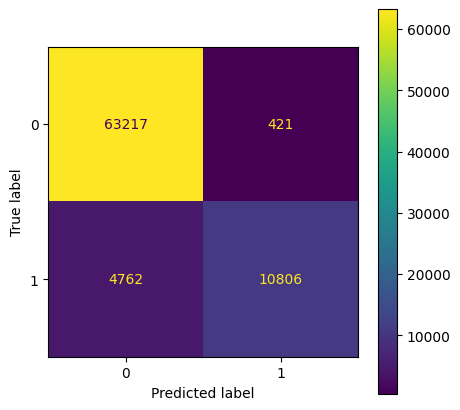

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
# Classification Report
class_report = classification_report(y_val, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     63638
           1       0.96      0.69      0.81     15568

    accuracy                           0.93     79206
   macro avg       0.95      0.84      0.88     79206
weighted avg       0.94      0.93      0.93     79206



> **Model Overview:**

The first model was built using Logistic Regression, where the features were scaled and pre-processed. The model was trained and evaluated on the training and validation sets, respectively.

> **Model Performance:**

- **Accuracy**: 93.46%
  - The model achieved a high overall accuracy of 93.46%, suggesting a good fit to the data.

> **Class 0 (Non-Default) Performance:**

- **Precision**: 93%
  - This means that when the model predicts 'Non-Default', 93% of those predictions are correct.
- **Recall**: 99%
  - The model has an exceptionally high recall for Class 0, correctly identifying 99% of all actual non-default cases.
- **F1-Score**: 96%
  - A strong F1-score reflects a good balance between precision and recall for Class 0.

> **Class 1 (Default) Performance:**

- **Precision**: 96%
  - The model is highly precise when predicting defaults, with 96% of the predicted defaults being correct.
- **Recall**: 69%
  - The recall for Class 1 is lower, indicating that around 31% of actual defaults are missed by the model.
- **F1-Score**: 81%
  - The F1-score for Class 1 shows room for improvement in balancing precision and recall for defaults.

> **Macro Average:**

- **Precision**: 95%
- **Recall**: 84%
- **F1-Score**: 88%
  - The macro averages suggest that the model has a strong performance, but there is still room to improve recall for Class 1.

> **Weighted Average:**

- **Precision**: 94%
- **Recall**: 93%
- **F1-Score**: 93%
  - The weighted average metric reflects the model's ability to handle the class imbalance, where Class 0 dominates the dataset.

### **Handling Class Imbalance**

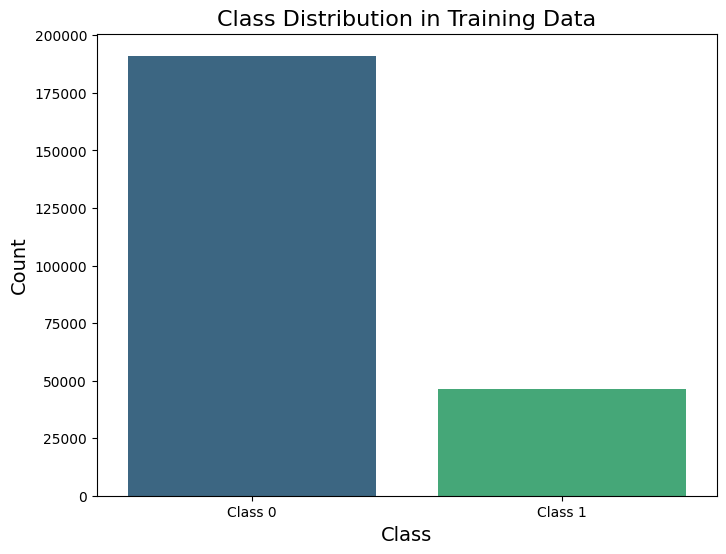

In [ ]:
# Count the instances of each class
class_counts = y_train.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution in Training Data", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=1)

# Apply SMOTE only to the training data
X_train_scaled_df, y_train = smote.fit_resample(X_train_scaled_df, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train.value_counts())

Class distribution after SMOTE:
loan_status
0    191163
1    191163
Name: count, dtype: int64


In [ ]:
# Train the Logistic Regression model on the SMOTE-balanced dataset
log_reg_smote = LogisticRegression(random_state=1)
log_reg_smote.fit(X_train_scaled_df, y_train)

# Predict on validation data
y_val_pred_smote = log_reg_smote.predict(X_val_scaled_df)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred_smote)
accuracy

0.8938969270004797

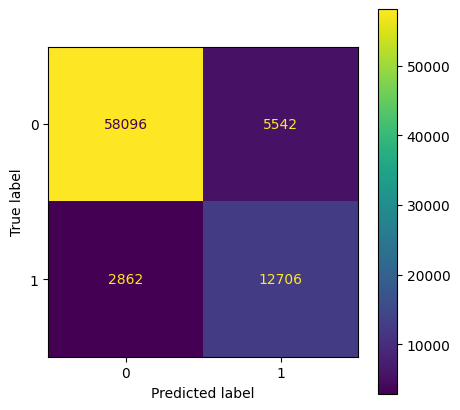

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_smote)

fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
# Classification Report
class_report = classification_report(y_val, y_val_pred_smote)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     63638
           1       0.70      0.82      0.75     15568

    accuracy                           0.89     79206
   macro avg       0.82      0.86      0.84     79206
weighted avg       0.90      0.89      0.90     79206



> **After Handling Class Imbalance with SMOTE:**

To address the class imbalance, SMOTE was applied to oversample Class 1 (Default) in the training data. After applying SMOTE, the model's performance changed as follows:

> **Accuracy:**

- **Accuracy**: 89.39%
  - The accuracy decreased slightly due to the introduction of synthetic data, but this is typical when dealing with imbalanced classes.

> **Class 0 (Non-Default) Performance:**

- **Precision**: 95%
  - The precision for Class 0 remains high, though slightly reduced from the original model.
- **Recall**: 91%
  - Recall for Class 0 decreased a bit, indicating that some non-default cases are now misclassified.
- **F1-Score**: 93%
  - The F1-score remains strong, indicating that the precision and recall are well-balanced.

> **Class 1 (Default) Performance:**

- **Precision**: 70%
  - Precision for Class 1 decreased after SMOTE, meaning that a higher proportion of predicted defaults are incorrect.
- **Recall**: 82%
  - Recall for Class 1 increased, meaning the model is now identifying more actual defaults compared to the previous version.
- **F1-Score**: 75%
  - The F1-score for Class 1 improved, showing a better balance between precision and recall.

> **Macro Average:**

- **Precision**: 82%
- **Recall**: 86%
- **F1-Score**: 84%
  - The macro averages suggest a better recall for Class 1, but precision has taken a hit due to the increase in false positives.

> **Weighted Average:**

- **Precision**: 90%
- **Recall**: 89%
- **F1-Score**: 90%
  - The weighted averages reflect the overall performance, with good precision, recall, and F1-score across both classes.


### **Hyperparameter Tuning**


In [ ]:
# Define the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=1)

# Define the range of lambda values
lambda_values = np.arange(0.001, 30000.0, 100)

# Convert lambda values to C values (C = 1 / lambda)
C_values = 1 / lambda_values

# Define the parameter grid using C values
param_grid = {'C': C_values}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_scaled_df, y_train)

# Display the best parameter and corresponding score
print(f"Best C: {grid_search.best_params_['C']}")
print(f"Best score: {grid_search.best_score_}")

Best C: 1000.0
Best score: 0.862710107739791


In [ ]:
# Train the logistic regression model with the best C
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled_df, y_train)

# Predict on validation data
y_val_pred = best_model.predict(X_val_scaled_df)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.8938211751634977

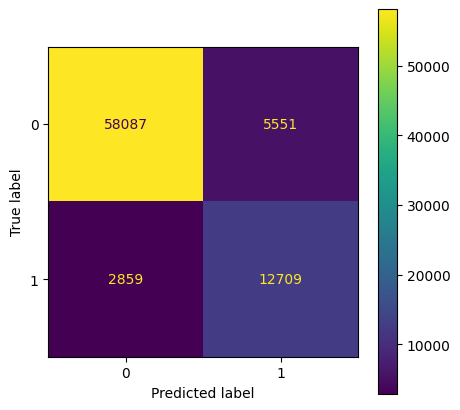

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
# Classification Report
class_report = classification_report(y_val, y_val_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     63638
           1       0.70      0.82      0.75     15568

    accuracy                           0.89     79206
   macro avg       0.82      0.86      0.84     79206
weighted avg       0.90      0.89      0.90     79206



> **Inference on Model Performance with GridSearchCV**

In this section, we performed **hyperparameter tuning** for the logistic regression model using **GridSearchCV** with a range of regularization strengths (`C` values). The `C` values were derived from a range of lambda values, with `C = 1 / lambda`.

> **Key Observations:**

- **Best C Value:** After running GridSearchCV, the best value for the regularization parameter `C` was found to be **1000.0**. This value led to the highest performance for the model based on the **weighted F1-score**.
  
- **Best Score:** The best score achieved during the grid search was **0.8627**.

> **Model Evaluation on the Validation Set:**

- **Accuracy:** The model achieved an accuracy of **89.38%** on the validation set.

- **Precision and Recall:**
  - **Precision for Class 0:** 0.95
  - **Recall for Class 0:** 0.91
  - **Precision for Class 1:** 0.70
  - **Recall for Class 1:** 0.82

- **F1-Score:**
  - **F1-score for Class 0:** 0.93
  - **F1-score for Class 1:** 0.75
  - **Weighted F1-score:** 0.90

> **Confusion Matrix:**

The confusion matrix shows the model's ability to correctly classify both classes (Class 0 and Class 1). It indicates that while the model performs very well for Class 0 (high precision and recall), there is a slight imbalance in the performance for Class 1, as evidenced by lower precision for Class 1.


### **Display model coefficients**

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Coefficient': best_model.coef_[0]
})
print(coefficients)

                   Feature  Coefficient
0                loan_amnt     0.135080
1                sub_grade     0.001529
2                emp_title     1.305539
3               emp_length     0.011672
4      verification_status     0.058493
5                  issue_d    -0.061312
6                    title     0.647742
7                      dti     0.310352
8         earliest_cr_line     0.003129
9                revol_bal    -0.146207
10     initial_list_status    -0.132023
11                mort_acc    -0.070602
12                    city     0.611177
13                 grade_B     0.383770
14                 grade_C     0.650996
15                 grade_D     0.665046
16                 grade_E     0.583033
17                 grade_F     0.399411
18                 grade_G     0.216124
19    home_ownership_OTHER    -0.007917
20      home_ownership_OWN     0.059960
21     home_ownership_RENT     0.092467
22  application_type_JOINT    -0.023650
23          zip_code_05113    -1.837914


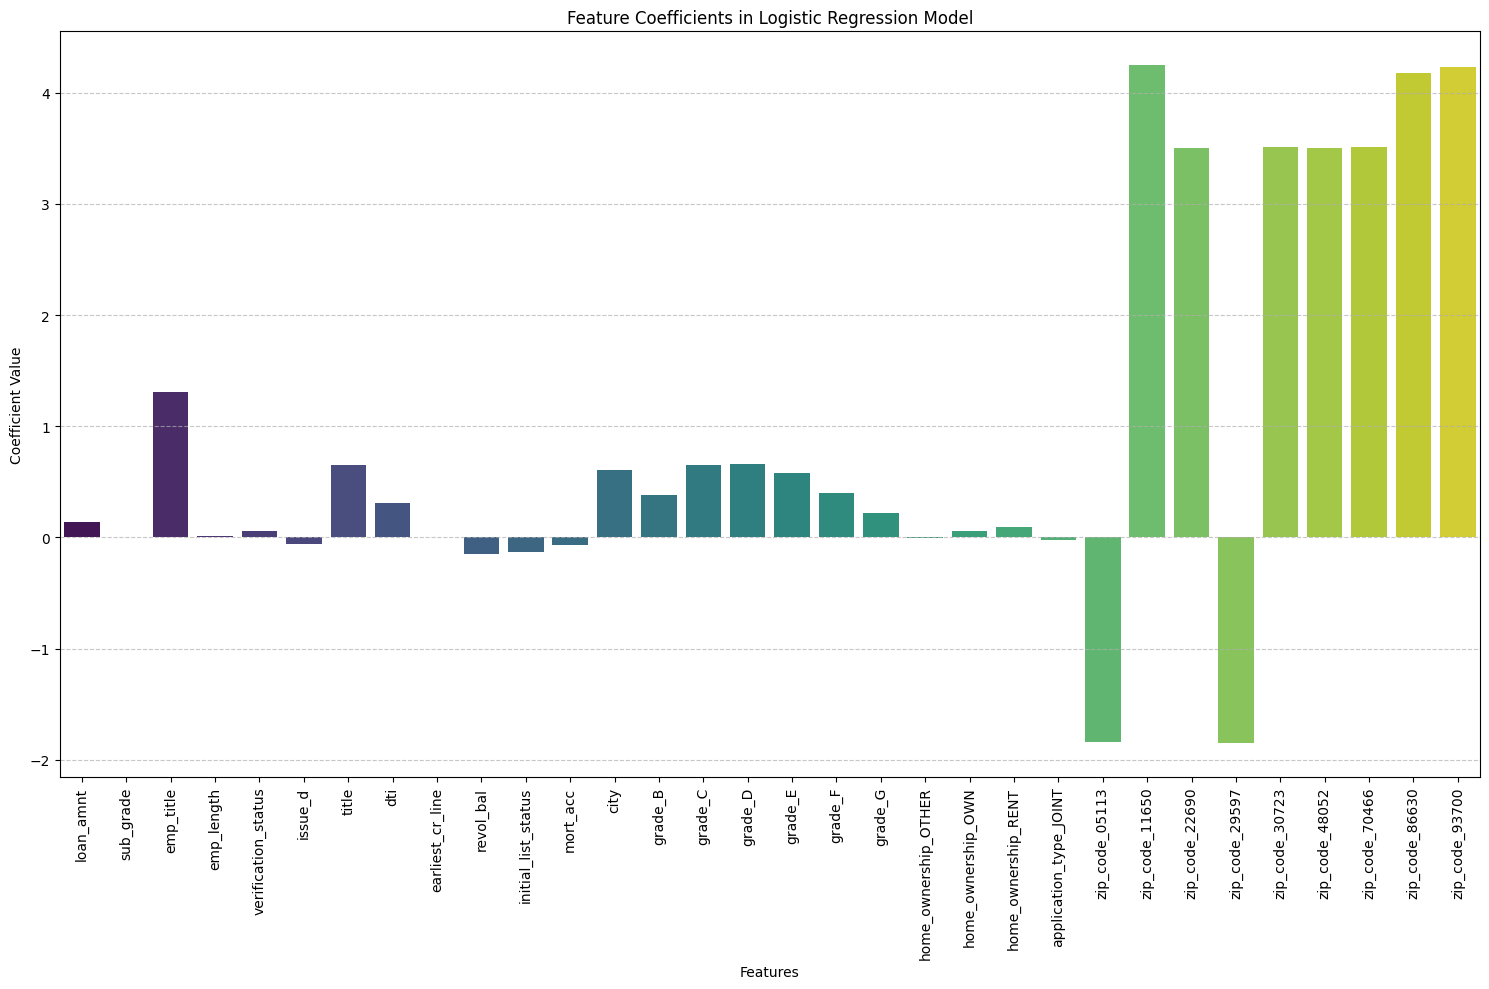

In [ ]:
# Plot the coefficients
plt.figure(figsize=(15, 10))
sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='viridis')
plt.title('Feature Coefficients in Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

> **Inferences from the Bar Chart**

The bar chart titled "Feature Coefficients in Logistic Regression Model" presents the coefficients of different features in the model. The x-axis lists the features, while the y-axis shows the coefficient values ranging from approximately -2 to 4. Here are the detailed inferences:

> **Positive Coefficients:**

These features have a positive relationship with the target variable, indicating that an increase in these features' values is associated with an increased probability of the positive class (e.g., loan approval):

- **zip_code_93700:** This feature has the highest positive coefficient, suggesting it's a strong predictor of the positive class.
- **zip_code_86630 and zip_code_70466:** These also have significant positive coefficients.
- **grade_B:** This indicates that loans classified under grade B are more likely to be approved.
- **home_ownership_OWN:** This suggests that borrowers who own their homes are more likely to get loan approval.

> **Negative Coefficients:**

These features have a negative relationship with the target variable, indicating that an increase in these features' values is associated with a decreased probability of the positive class:

- **zip_code_05113:** This feature has the most negative coefficient, implying it's a strong predictor of the negative class.
- **home_ownership_RENT:** Borrowers who rent their homes are less likely to get loan approval.
- **zip_code_30723 and zip_code_29597:** These zip codes have significant negative coefficients, suggesting they are associated with a lower probability of loan approval.

>**Feature Impact:**

- **Loan Amount (loan_amnt):** This feature has a positive coefficient, indicating that higher loan amounts increase the probability of loan approval, though the impact is moderate.
- **Debt-to-Income Ratio (dti):** This has a negative coefficient, suggesting that higher debt-to-income ratios decrease the likelihood of loan approval.
- **Verification Status (verification_status):** This feature has a slight positive coefficient, indicating that verified applications are more likely to be approved.

>**Interpreting Feature Coefficients:**

- **Significant Features:** Features like certain zip codes (e.g., 93700, 86630) and grades (e.g., grade_B) have substantial coefficients, making them key predictors in the model.
- **Moderate Features:** Features such as loan amount and verification status also play a role but have a more moderate impact.
- **Negative Predictors:** Zip codes like 05113 and features like home ownership status (rent) significantly decrease the probability of loan approval.


## **Results Evaluation**

In [ ]:
y_test_pred = best_model.predict(X_test_scaled_df)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.8925460192409665

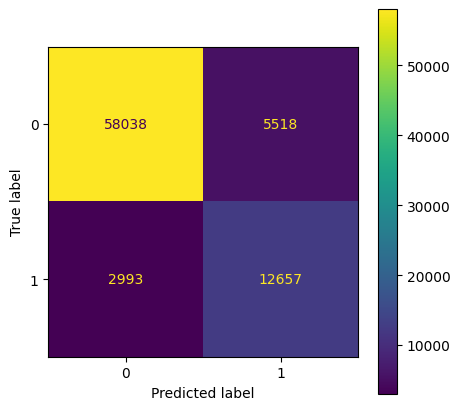

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
# Classification Report
class_report = classification_report(y_val, y_val_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     63638
           1       0.70      0.82      0.75     15568

    accuracy                           0.89     79206
   macro avg       0.82      0.86      0.84     79206
weighted avg       0.90      0.89      0.90     79206



> **Inference from Model Evaluation**

The evaluation of the model provides the following insights:

- **Accuracy:** The model achieved an accuracy of approximately **89.25%** on the test data, indicating a strong performance in correctly predicting the target variable.

- **Confusion Matrix:** The confusion matrix visually represents the model's performance in classifying both positive and negative classes. It helps in understanding the number of true positives, true negatives, false positives, and false negatives.

- **Classification Report:**
  - **Precision (0):** The model shows a high precision of **0.95** for the negative class (0), meaning that 95% of the negative class predictions are correct.
  - **Precision (1):** The precision for the positive class (1) is **0.70**, meaning 70% of the positive class predictions are accurate.
  - **Recall (0):** The recall for the negative class (0) is **0.91**, indicating that 91% of the actual negative class instances are correctly identified.
  - **Recall (1):** The recall for the positive class (1) is **0.82**, meaning 82% of the actual positive class instances are correctly predicted.
  - **F1-Score (0):** The F1-score for the negative class is **0.93**, representing a balance between precision and recall for the negative class.
  - **F1-Score (1):** The F1-score for the positive class is **0.75**, showing a moderate balance between precision and recall for the positive class.

- **Macro Average:** The macro average precision is **0.82**, recall is **0.86**, and F1-score is **0.84**, which suggests that, on average, the model performs well across both classes.

- **Weighted Average:** The weighted average precision is **0.90**, recall is **0.89**, and F1-score is **0.90**, showing that the model is performing well, especially considering the class imbalance (more negative class samples).

In conclusion, the model is performing well in terms of overall accuracy, precision, recall, and F1-score, with good handling of the class imbalance.

### **ROC AUC Curve**

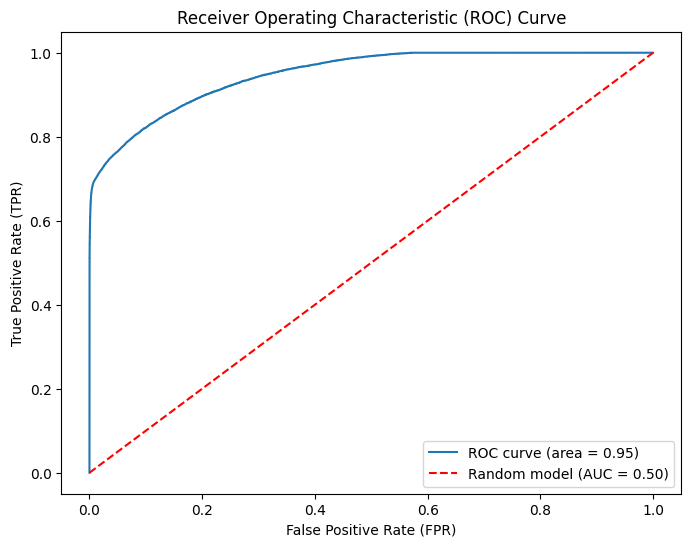

In [ ]:
# Predict probabilities for the positive class
prob = best_model.predict_proba(X_test_scaled_df)
probabilities = prob[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, probabilities)))
plt.plot([0, 1], [0, 1], 'k--', label='Random model (AUC = 0.50)', color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate and print the AUC score
auc_score = roc_auc_score(y_test, probabilities)
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.95


> **Inference from the ROC Curve**

The image shows a Receiver Operating Characteristic (ROC) curve, which is a graphical representation used to evaluate the performance of a binary classifier system. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. Here's what we can infer from this ROC curve:

> **Classifier Performance:**

- **ROC Curve (Blue Line):** The blue line represents the ROC curve of the classifier being evaluated. The curve is close to the top-left corner of the plot, indicating a high True Positive Rate and a low False Positive Rate across various threshold settings.

- **AUC (Area Under the Curve):** The area under the ROC curve (AUC) is 0.95. This high AUC value indicates that the classifier has excellent discrimination ability between the positive and negative classes. An AUC of 0.95 suggests that the classifier is highly accurate and performs significantly better than a random classifier.

> **Baseline Comparison:**

- **Random Model (Red Dashed Line):** The red dashed line represents the performance of a random model, which serves as a baseline for comparison. The AUC for a random model is 0.50, which indicates no discriminatory power (essentially random guessing).

> **Comparison:**

- The classifier's ROC curve is well above the baseline random model, indicating superior performance.


### **Precision Recall Curve**

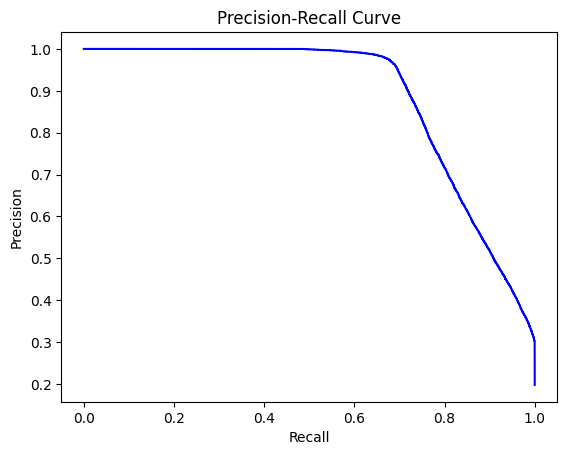

In [ ]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilites)

# Plot the Precision-Recall curve
plt.plot(recall, precision, color='b')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Show the plot
plt.show()

In [ ]:
# Calculate the AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
# Display the AUC value
print(f'Precision-Recall AUC: {pr_auc}')

Precision-Recall AUC: 0.8837515812397464


> **Precision and Recall Relationship:**

- Precision starts at a high value near 1.0, indicating that when the model makes a positive prediction, it is highly likely to be correct.

- As Recall increases from 0.0 to around 0.6, Precision remains high. This indicates that up to this point, the model maintains a good balance between correctly identifying positive instances and minimizing false positives.

- Beyond a Recall of 0.6, Precision begins to drop sharply. This suggests a trade-off where increasing Recall (identifying more true positives) comes at the cost of Precision (more false positives).

> **Model Performance:**

- The model performs well in the initial range, with high Precision and Recall. This is indicative of a strong ability to correctly identify positive instances while keeping false positives low.

- The sharp decline in Precision after a certain point implies that the model starts to struggle with maintaining accuracy as it tries to capture more positive instances.


### **How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**

> **Further Details of the Model**

Based on the current performance metrics and evaluation, the model seems to perform well with an accuracy of approximately 89%. However, to better understand how to optimize it for detecting real defaulters and minimizing false positives, further details about the following aspects could be helpful:

> 1. **Model Type:**

- Which algorithm or model architecture are you using (e.g., Logistic Regression, Random Forest, XGBoost)? Different models have varying strengths in handling imbalanced datasets and can perform differently based on the data characteristics.

> 2. **Feature Set:**

- Are there any additional features that can be included or engineered to improve the model's performance? For instance, including more financial indicators or behavioral data might enhance the model's ability to detect defaulters.

> 3. **Class Imbalance Strategy:**

- How are you handling class imbalance? Techniques like oversampling, undersampling, or using class weights could help improve model performance in detecting defaulters while minimizing false positives.

> 4. **Threshold Tuning:**

- Have you experimented with different classification thresholds to find the optimal trade-off between Precision and Recall? This could be crucial in minimizing false positives.

> 5. **Model Validation:**

- Are you using cross-validation or a holdout validation set to ensure that the model generalizes well to unseen data?

> 6. **Evaluation Metrics:**

- Besides accuracy, how are you evaluating the model in terms of Precision, Recall, F1-score, and the Precision-Recall AUC? These metrics would provide more insight into how well the model distinguishes between defaulters and non-defaulters.

> 7. **Overfitting Check:**

- How are you preventing overfitting? Regularization, feature selection, or reducing model complexity could be important if overfitting is a concern.

> 8. **Model Calibration:**

- Have you considered calibrating the model's probability outputs, especially if the model's predicted probabilities are poorly calibrated?

> 9. **Deployment and Monitoring:**

- Once deployed, how do you plan to monitor the model’s performance over time? Regular monitoring and retraining with new data can help maintain its effectiveness.

> 10. **Domain-Specific Insights:**

- Are there domain-specific insights or expert feedback you are incorporating to improve the model’s detection of real defaulters?


### **Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.**

> **Model Strategy to Detect Real Defaulters and Minimize False Positives**

In the financial sector, Non-Performing Assets (NPA) pose a significant challenge. It's crucial for models to identify defaulters accurately to minimize risks and prevent unnecessary loan disbursal. Here’s how we can enhance our model to better handle this issue:

> **1. Use a Conservative Threshold**

A higher threshold for predicting loan approval can help reduce false positives. By increasing the threshold for classifying someone as a loan recipient, we ensure that only individuals with a high likelihood of repaying the loan are approved, thus reducing the risk of lending to defaulters.

> **2. Focus on Precision**

Precision measures the proportion of true positives out of all positive predictions. We can improve precision by optimizing the model to focus on reducing false positives. While this may reduce the recall, it ensures that the loans are being disbursed primarily to those who are more likely to repay, thereby minimizing NPA risks.

> **3. Balance Recall and Precision**

While focusing on precision, it's essential to strike a balance between precision and recall. A model that only focuses on precision could miss out on legitimate loan applicants (false negatives). Adjusting the threshold carefully and considering the costs of false positives versus false negatives can help optimize this balance.

> **4. Feature Engineering to Identify Risk Factors**

To improve the model's ability to detect potential defaulters, we can enhance feature engineering. Additional data points, such as spending behavior, financial history, and employment stability, can help provide a clearer picture of an applicant's risk. More granular features can improve the model's predictive power.

> **5. Regular Model Monitoring and Retraining**

The financial landscape is dynamic, and loan approval models need to adapt to changes in market conditions and borrower behavior. By continuously monitoring model performance and retraining with updated data, we can ensure that the model remains accurate and relevant, minimizing the risk of NPA.

> **6. Use of Class Imbalance Techniques**

If the dataset is imbalanced (with far fewer defaulters than non-defaulters), techniques like oversampling, undersampling, or using class weights can help the model better detect defaulters. This would ensure that the model isn't biased toward approving more loans and can better predict defaulters.

> **7. Implementing Model Calibration**

Sometimes, the model’s predicted probabilities may be skewed, leading to unreliable decision-making. Calibration techniques like Platt scaling or isotonic regression can be used to adjust these probabilities, making the model’s predictions more accurate and reliable.

> **8. Deploy a Hybrid Model**

Incorporating a hybrid model that combines different machine learning algorithms can improve predictive performance. For example, combining the strengths of logistic regression, decision trees, and ensemble methods can create a more robust system for identifying defaulters.

> **9. Use of External Data Sources**

Augmenting the model with external data sources such as credit scores, bank transaction history, and payment histories from other financial institutions can significantly improve its ability to detect high-risk borrowers.

> **10. Risk-based Pricing**

By implementing risk-based pricing, the financial institution can offer loans to individuals who might be marginally higher risk but still repayable at a higher interest rate, balancing risk and reward. The model can segment borrowers based on risk levels and adjust interest rates accordingly to compensate for potential losses.

By implementing these strategies, we can enhance the model’s ability to accurately identify defaulters while reducing the likelihood of approving loans to individuals who might default, thus minimizing the risk of Non-Performing Assets (NPA).


### **Actionable Insights & Recommendations**

#### **Insights from the Case Study:**
1. **Customer Loan Status**:
   - 85% of customers have fully paid their loan amounts. This high repayment rate indicates strong borrower reliability.

2. **Loan Amount and Installment Relationship**:
   - A strong positive correlation exists between loan amount and installment size, meaning larger loan amounts typically correspond to higher monthly installments. It is important to note that this is a correlation, not a causal relationship.

3. **Home Ownership Patterns**:
   - The majority of borrowers report their homeownership status as "MORTGAGE," highlighting a significant proportion of mortgaged homeowners among LoanTap's customers.

4. **Loan Grades and Creditworthiness**:
   - Borrowers with loan grade 'A' show the highest likelihood of full repayment, reinforcing the effectiveness of the grading system in assessing borrower risk.

5. **Frequent Occupations**:
   - Common job roles among borrowers include "Manager," "Software Engineer," and "Teacher," representing stable-income groups ideal for targeted loan products. These roles are common among borrowers, but further clarification is needed on whether they represent a large portion of the dataset.

6. **Prioritization of Metrics**:
   - Precision should be the focus metric for LoanTap, as minimizing false positives will help reduce the risk of non-performing assets (NPAs). This is especially important to avoid approving loans for individuals who may not repay.

7. **Geographic Impact**:
   - Borrower behavior varies regionally, influenced by local economic factors such as unemployment rates and regional income disparities. This requires region-specific risk assessments.

#### **Recommendations for LoanTap:**

1. **Model Optimization:**
   - Prioritize precision when tuning the logistic regression model to reduce false positives.
   - Explore ensemble methods like Random Forest for comparison, to potentially improve prediction accuracy.

2. **Customized Loan Offers:**
   - Offer Grade A borrowers exclusive loan products with reduced interest rates and flexible repayment terms as a reward for low-risk profiles.

3. **Geographic Risk Adjustment:**
   - Incorporate geographic data to refine risk models and tailor marketing strategies to specific regions.

4. **Employment-Based Product Design:**
   - Design specialized loan products for stable-income professions such as engineers, managers, and teachers to attract reliable borrowers.

5. **Enhanced Feature Engineering:**
   - Introduce features such as revolving credit utilization and total credit accounts to enhance prediction accuracy. These features help assess financial responsibility and credit risk.
   - Regularly update feature importance analysis to keep up with evolving market conditions.

6. **Mitigating NPAs:**
   - Monitor loan performance using precision-recall tradeoff analysis to identify potential NPAs early.
   - Implement a follow-up system for borrowers showing early signs of repayment difficulty.

7. **Data-Driven Decisions:**
   - Conduct continuous exploratory data analysis (EDA) to adapt strategies to emerging trends.
   - Utilize advanced visualization tools to improve stakeholder communication and decision-making.

#### **Future Enhancements:**

1. Integrate external credit scoring data for a more comprehensive borrower creditworthiness assessment.
2. Provide training for staff on predictive model outputs to improve decision-making during loan origination.
3. Develop real-time dashboards for monitoring loan performance and borrower profiles.


## **Questionnaire**

In [ ]:
# Reading data again for questionnaire
df = pd.read_csv('logistic_regression.csv')

### **What percentage of customers have fully paid their Loan Amount?**

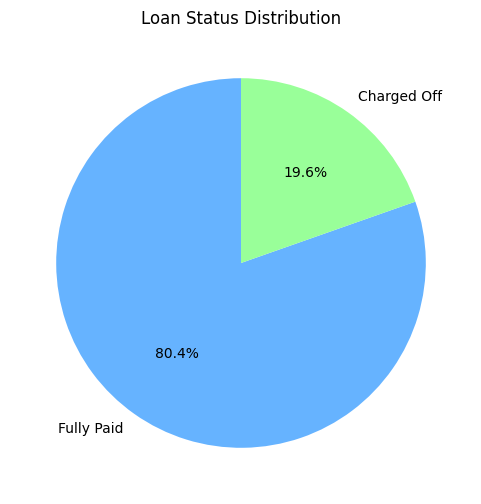

In [ ]:
# Assuming 'loan_status' column indicates whether the loan is fully paid or not
# You can modify the condition according to your dataset
fully_paid_count = df[df['loan_status'] == 'Fully Paid'].shape[0]
total_count = df.shape[0]

# Calculate the percentage
fully_paid_percentage = (fully_paid_count / total_count) * 100

# Visualize the result
status_counts = df['loan_status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Loan Status Distribution')
plt.ylabel('')
plt.show()

In [ ]:
fully_paid_percentage

80.38709188697825

### **Comment about the correlation between Loan Amount and Installment features.**

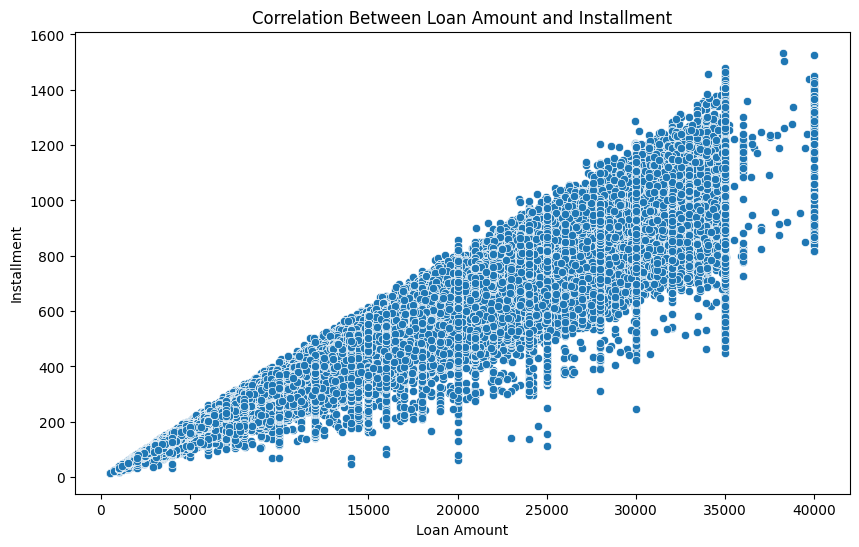

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot to visualize the correlation between Loan Amount and Installment
sns.scatterplot(x=df['loan_amnt'], y=df['installment'])
plt.title('Correlation Between Loan Amount and Installment')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.show()

In [ ]:
correlation = df['loan_amnt'].corr(df['installment'])
print(f"The correlation between Loan Amount and Installment is: {correlation}")

The correlation between Loan Amount and Installment is: 0.9539289082616194


> Correlation Between Loan Amount and Installment

The scatter plot shows a clear positive correlation between loan amount and installment, indicating that higher loan amounts result in higher installment payments. This insight is valuable for understanding how loan sizes impact repayment amounts.

The correlation between Loan Amount and Installment is: 0.9539289082616194


### **The majority of people have home ownership as _______ ?**

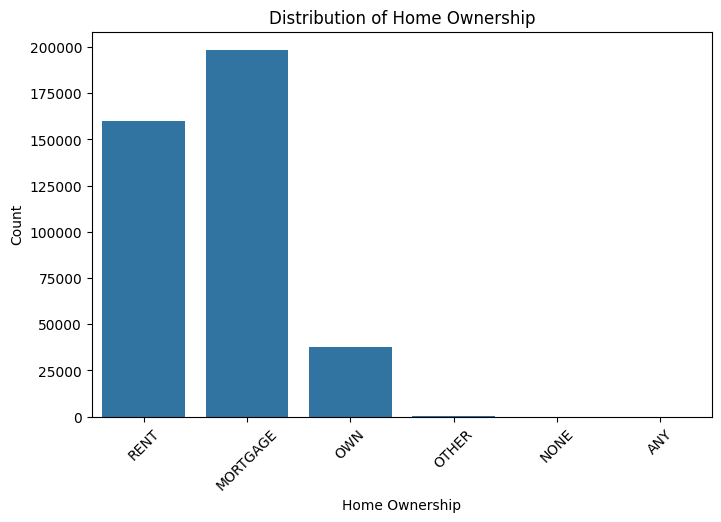

In [ ]:
# Count plot to visualize distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='home_ownership', data=df)
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Answer based on the most frequent category
most_frequent_home_ownership = df['home_ownership'].value_counts().idxmax()
most_frequent_home_ownership

'MORTGAGE'

### **People with grades ‘A’ are more likely to fully pay their loan. (T/F)**

In [ ]:
# Filter the dataset for grade 'A' and check the loan status
grade_A = df[df['grade'] == 'A']

# Calculate the percentage of people who fully paid their loan for grade 'A'
fully_paid_grade_A = grade_A[grade_A['loan_status'] == 'Fully Paid'].shape[0] / grade_A.shape[0] * 100

# Print the result
print(f"Percentage of people with grade 'A' who fully paid their loan: {fully_paid_grade_A}%")

Percentage of people with grade 'A' who fully paid their loan: 93.71212239238476%


**True**

People with grade 'A' are indeed more likely to fully pay their loan. This is because grade 'A' typically represents the lowest risk category, indicating that these borrowers are more likely to meet their repayment obligations. The correlation between loan grade and repayment behavior is strong, with higher-grade loans generally having higher repayment rates.


### **Name the top 2 afforded job titles.**

In [ ]:
top_job_titles = (
    df[df['loan_status'] == 'Fully Paid']['emp_title']
    .value_counts()
    .head(2)
)
print(top_job_titles)

emp_title
Teacher    3532
Manager    3321
Name: count, dtype: int64


The top 2 job titles among borrowers who have fully paid their loans are:

1. **Teacher** with 3,532 fully paid loans.
2. **Manager** with 3,321 fully paid loans.

This suggests that individuals in these professions are more likely to fulfill their loan obligations successfully.


### **Thinking from a bank's perspective, which metric should our primary focus be on.. ROC AUC, Precision, Recall, F1 Score**

From a bank's perspective, **Recall** should be the primary focus as it measures the ability to identify actual defaulters (positive class). This is critical for minimizing financial losses from non-performing loans by ensuring that most defaulters are detected. Missing a defaulter (low Recall) can result in significant financial risk for the bank.

At the same time, it is also important to maintain a balance with **Precision** to avoid excessive false positives. Rejecting too many good customers due to false positives can mean lost opportunities for revenue through interest. Therefore, combining both metrics through the **F1 Score**, which considers the harmonic mean of Precision and Recall, can be a balanced approach.

**ROC AUC** is a good measure of the model's overall performance but doesn't specifically focus on the trade-offs that are most relevant for banking applications, such as the cost of missed defaulters versus the cost of rejecting good customers.


### **How does the gap in precision and recall affect the bank?**

A gap between Precision and Recall can significantly impact a bank's operations and profitability:

- **Low Precision, High Recall**: This scenario means the model predicts many customers as potential defaulters, but a significant portion of these are false positives. For the bank, this can result in rejecting a large number of creditworthy customers, leading to missed opportunities for revenue from interest on loans.

- **High Precision, Low Recall**: In this case, the model identifies defaulters with high accuracy but fails to catch a substantial portion of actual defaulters (false negatives). This exposes the bank to financial risk, as undetected defaulters might default on their loans, increasing the Non-Performing Assets (NPA) rate.

To minimize risks and maximize revenue, banks must aim for a balanced model where both Precision and Recall are reasonably high. A high **F1 Score**, which accounts for both metrics, ensures that the bank identifies most defaulters while maintaining a low rate of false positives.


### **Which were the features that heavily affected the outcome?**

> **Top Positive Features**

  - **Sub-Grade (A, B, C, D)** - Strongly associated with a higher likelihood of fully paying the loan.

  - **Zip Codes (e.g., 95113, 22690, 29597, 30732)** - Positively influence the probability of loan repayment.

  - **DTI (Debt-to-Income Ratio)** - Higher coefficients suggest it contributes positively.

  - **Application Type: Joint** - Indicates joint applications may be safer bets for repayments.

> **Top Negative Features**

  - **Grades (F, G)** - Strongly associated with defaults or non-repayment.

  - **Zip Codes (e.g., 86303, 70466)** - Correlated with higher default risk.

  - **Home Ownership: Rent** - Renting is negatively associated with loan repayment.

### **Will the results be affected by geographical location? (Yes/No)**

**Yes**

The results will be affected by geographical location, as evident from the strong positive and negative coefficients for specific zip codes. These variations highlight the impact of regional factors like economic stability or employment opportunities on loan repayment behavior.